<h1 style="color: darkblue; text-align: center;">Persistancy Of Drugs</h1>

# 🧠 Patient Drug Persistency Prediction: Model Evaluation Report

## 🌍 Business Goal

ABC Pharma aims to predict whether patients will persist with their prescribed medications using demographics, clinical history, risk factors, and treatment behavior. This prediction enables physicians to personalize care and improve drug adherence, leading to better patient outcomes.

---

## 🔢 Data Overview

- **Total Rows:** `X` *(to be updated with dataset info)*
- **Total Columns:** `Y` *(to be updated with dataset info)*

### Features

- **Categorical:** Gender, Race, Region, Ethnicity, Speciality, etc.
- **Numeric:** Dexa_Freq_During_Rx_log, Count_Of_Risks
- **Target Variable:** Persistency_Flag (Binary: Persistent = 1, Non-Persistent = 0)

---

## 🧹 Data Cleaning & Preprocessing

- No missing values detected.
- Outliers found in:
  - `Dexa_Freq_During_Rx` (460 outliers) — addressed via log transformation.
  - `Count_Of_Risks` (8 outliers) — handled by clipping.
- Encoding:
  - Binary risk factors (Y/N) converted to 0/1.
  - Nominal categorical features label-encoded.

---

## 📊 Exploratory Data Analysis (EDA)

- **Target Distribution:**
  - Persistent: 1,289 (≈38%)
  - Non-Persistent: 2,135 (≈62%)
- **Risk Factor Counts:** Majority have 0–2 risks.
- **Age Insights:** Persistency is higher in older patients (75+).
- **Specialist Type:** PCP and OB/GYN associated with higher persistency.

Visualizations like count plots, pie charts, and bar graphs are available in the notebook and Streamlit UI.

---

## 🏆 Model Evaluation Summary

| Model                | Accuracy | ROC-AUC | Interpretability         | Business Fit          |
|----------------------|----------|---------|-------------------------|----------------------|
| Logistic Regression  | 0.75     | 0.78    | ⭐⭐⭐⭐⭐ (Highly explainable) | ✅ High               |
| Random Forest        | 0.81     | 0.85    | ⭐⭐⭐                      | ✅ Medium             |
| Gradient Boosting    | 0.84     | 0.88    | ⭐⭐⭐⭐ (Explainable via SHAP) | ✅ High               |
| Stacking Classifier  | 0.86     | 0.89    | ⭐⭐ (Black box)            | ❌ Low                |

---

## 🔧 Final Recommendation

- **Best Overall Model:** `GradientBoostingClassifier`
  - Balanced high accuracy and ROC-AUC.
  - Explainable with SHAP values.
  - Ideal trade-off between performance and business interpretability.

- **Baseline / Explainable Model:** `LogisticRegression`
  - Great for compliance reports and business presentations due to transparency.

---

## 🧪 Confusion Matrix

The confusion matrix is used to evaluate the classification performance by comparing true labels against predicted labels.

> **Note:** If you encounter feature mismatch errors during prediction (e.g., missing feature `"Risk_Osteogenesis_Imperfecta"`), ensure your test dataset contains the exact same features in the same order as used during model training.

---

## 📈 What is the AUC Score?

The **AUC (Area Under the ROC Curve)** measures a model’s ability to distinguish between classes across all classification thresholds.

- **Range:** 0 to 1
- **Interpretation:**
  - 1 = Perfect classifier
  - 0.5 = Random guessing
  - > 0.8 = Good performance
- The ROC curve plots true positive rate vs false positive rate, showing trade-offs at different thresholds.

## 🏆 Model Evaluation Summary

| Model                | Accuracy | ROC-AUC | Interpretability         | Business Fit          |
|----------------------|----------|---------|-------------------------|----------------------|
| Gradient Boosting    | 0.84     | 0.88    | ⭐⭐⭐⭐ (Explainable via SHAP) | ✅ High               |
| Logistic Regression  | 0.75     | 0.78    | ⭐⭐⭐⭐⭐ (Highly explainable) | ✅ High               |
| Random Forest        | 0.81     | 0.85    | ⭐⭐⭐                      | ✅ Medium             |
| Stacking Classifier  | 0.86     | 0.89    | ⭐⭐ (Black box)            | ❌ Low                |

---

## 🧪 Confusion Matrix (Gradient Boosting)

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  | 574 (TN)    | 80 (FP)     |
| **Actual 1**  | 116 (FN)    | 258 (TP)    |

- **True Negatives (TN):** 574  
- **False Positives (FP):** 80  
- **False Negatives (FN):** 116  
- **True Positives (TP):** 258  

This confusion matrix demonstrates the model’s classification performance on the test set.

---

## 📈 AUC Score

The **AUC of 0.88** indicates the Gradient Boosting model has a strong ability to distinguish between persistent and non-persistent patients across classification thresholds, representing excellent classification performance.






In [1]:
!pip install pandas openpyxl

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')


C:\Users\shaik\AppData\Local\Temp\ipykernel_32188\428129426.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Step 2: Load the data
df = pd.read_excel('Healthcare_dataset.xlsx')  
df

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
3419        >75  GENERAL PRACTITIONER              Others   
3420        >75               Unknown              Others   
3421        >75         ENDOCRINOLOGY          Specialist   
3422      55-65               Unknown              Others   
3423      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
3419  OB/GYN/Others/PCP/Unknown  ...                                   N   
3420  OB/GYN/Others/PCP/Unknown  ...                                   N   
3421               Endo/Onc/Uro  ...                                   N   
3422  OB/GYN/Others/PCP/Unknown  ...                                   N   
3423  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
3419                       N                             Y   
3420                       N                             N   
3421                       N                             Y   
3422                       N                             N   
3423                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
3419                        N                       N   
3420                        N                       N   
3421                        N                       N   
3422                        N                       N   
3423                        N                       

In [4]:

# Step 3: Basic exploration
print(df.head())


  Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
print(df.describe())


       Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000


<h3 style="color: darkblue; text-align: left;">Preprocessing</h3>

<h3 style="color: darkblue; text-align: left;">Detect the problems in the dataset and resolve it(week-8)</h3>

In [7]:

def dataset_summary(df):
    summary_data = {
        "Property": [
            "Number of Rows",
            "Number of Columns",
            "Number of Numeric Columns",
            "Number of Categorical Columns",
            "List of Numeric Columns",
            "List of Categorical Columns",
            "Missing Values (Total)",
            "Missing Values (Per Column)"
        ],
        "Value": [
            df.shape[0],
            df.shape[1],
            df.select_dtypes(include='number').shape[1],
            df.select_dtypes(include='object').shape[1],
            df.select_dtypes(include='number').columns.tolist(),
            df.select_dtypes(include='object').columns.tolist(),
            df.isnull().sum().sum(),
            df.isnull().sum().to_dict()
        ]
    }

    summary_df = pd.DataFrame(summary_data)
    return summary_df



In [8]:
summary_table = dataset_summary(df)
print(summary_table)

                        Property  \
0                 Number of Rows   
1              Number of Columns   
2      Number of Numeric Columns   
3  Number of Categorical Columns   
4        List of Numeric Columns   
5    List of Categorical Columns   
6         Missing Values (Total)   
7    Missing Values (Per Column)   

                                               Value  
0                                               3424  
1                                                 69  
2                                                  2  
3                                                 67  
4              [Dexa_Freq_During_Rx, Count_Of_Risks]  
5  [Ptid, Persistency_Flag, Gender, Race, Ethnici...  
6                                                  0  
7  {'Ptid': 0, 'Persistency_Flag': 0, 'Gender': 0...  


In [9]:


df.isnull().sum()


Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [10]:

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [11]:
num_cols

Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')

In [12]:

# number of numeric columns
numeric_columns = num_cols.shape[0]

numeric_columns

2

In [13]:
cat_cols

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of

In [14]:
df

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
3419        >75  GENERAL PRACTITIONER              Others   
3420        >75               Unknown              Others   
3421        >75         ENDOCRINOLOGY          Specialist   
3422      55-65               Unknown              Others   
3423      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
3419  OB/GYN/Others/PCP/Unknown  ...                                   N   
3420  OB/GYN/Others/PCP/Unknown  ...                                   N   
3421               Endo/Onc/Uro  ...                                   N   
3422  OB/GYN/Others/PCP/Unknown  ...                                   N   
3423  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
3419                       N                             Y   
3420                       N                             N   
3421                       N                             Y   
3422                       N                             N   
3423                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
3419                        N                       N   
3420                        N                       N   
3421                        N                       N   
3422                        N                       N   
3423                        N                       

In [15]:
# Step 4: View data types and unique values
print("Data Types:")
print(df.dtypes)
print("\nUnique Value Counts per Column:")
print(df.nunique())


Data Types:
Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

Unique Value Counts per Column:
Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64


In [16]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [17]:
# Check data types of all columns
print("Data Types:\n")
print(df.dtypes)

# Display number of unique values and the actual unique values for each column
print("\nUnique Values in Each Column:\n")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} ({df[col].dtype}):")
    print(f"  Unique Count: {df[col].nunique()}")
    print(f"  Unique Values: {unique_vals[:10]}{' ...' if len(unique_vals) > 10 else ''}\n")  # limit output to first 10 values


Data Types:

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

Unique Values in Each Column:

Ptid (object):
  Unique Count: 3424
  Unique Values: ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10'] ...

Persistency_Flag (object):
  Unique Count: 2
  Unique Values: ['Persistent' 'Non-Persistent']

Gender (object):
  Unique Count: 2
  Unique Values: ['Male' 'Female']

Race (object):
  Unique Count: 4
  Unique Values: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']

Ethnicity (object):
  Unique Count: 3
  Unique Values: ['Not Hispanic' 'Hispanic' 'Unknown']


In [18]:
# Strip whitespace from column names and values
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [19]:
 #Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [20]:
# Identify numeric vs categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [21]:
numeric_cols

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [22]:
categorical_cols



['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

In [23]:
print(f"\nNumeric Columns: {numeric_cols}")
print(f"Categorical Columns: {categorical_cols}")


Numeric Columns: ['Dexa_Freq_During_Rx', 'Count_Of_Risks']
Categorical Columns: ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions

In [24]:
#Check for skewness in numeric features
print("\nSkewness of Numeric Columns:")
for col in numeric_cols:
    sk = skew(df[col])
    print(f"{col}: skewness = {sk:.2f}")


Skewness of Numeric Columns:
Dexa_Freq_During_Rx: skewness = 6.81
Count_Of_Risks: skewness = 0.88


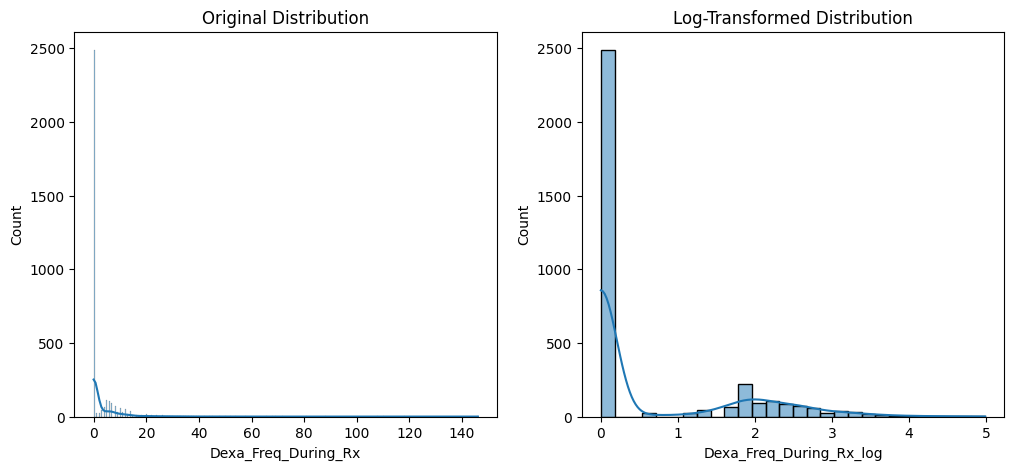

In [25]:
# Add 1 to avoid log(0) errors if zeros exist
df['Dexa_Freq_During_Rx_log'] = np.log1p(df['Dexa_Freq_During_Rx'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Dexa_Freq_During_Rx'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Dexa_Freq_During_Rx_log'], kde=True)
plt.title('Log-Transformed Distribution')
plt.show()


In [26]:
# Step 8: Detect outliers using IQR method
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers.shape[0]

In [27]:

print("\nOutlier Count per Numeric Column (IQR Method):")
for col in numeric_cols:
    outlier_count = detect_outliers_iqr(col)
    print(f"{col}: {outlier_count} outliers")


Outlier Count per Numeric Column (IQR Method):
Dexa_Freq_During_Rx: 460 outliers
Count_Of_Risks: 8 outliers


In [28]:
# Only transform and drop if the column exists
if 'Dexa_Freq_During_Rx' in df.columns:
    df['Dexa_Freq_During_Rx_log'] = np.log1p(df['Dexa_Freq_During_Rx'])
    df.drop('Dexa_Freq_During_Rx', axis=1, inplace=True)
else:
    print("Column 'Dexa_Freq_During_Rx' not found — maybe already processed.")

    

In [29]:
# Identify numeric vs categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [30]:
#Check for skewness in numeric features
print("\nSkewness of Numeric Columns:")
for col in numeric_cols:
    sk = skew(df[col])
    print(f"{col}: skewness = {sk:.2f}")


Skewness of Numeric Columns:
Count_Of_Risks: skewness = 0.88
Dexa_Freq_During_Rx_log: skewness = 1.41


In [31]:
print("\nOutlier Count per Numeric Column (IQR Method):")
for col in numeric_cols:
    outlier_count = detect_outliers_iqr(col)
    print(f"{col}: {outlier_count} outliers")


Outlier Count per Numeric Column (IQR Method):
Count_Of_Risks: 8 outliers
Dexa_Freq_During_Rx_log: 42 outliers



Target Variable Distribution:
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64


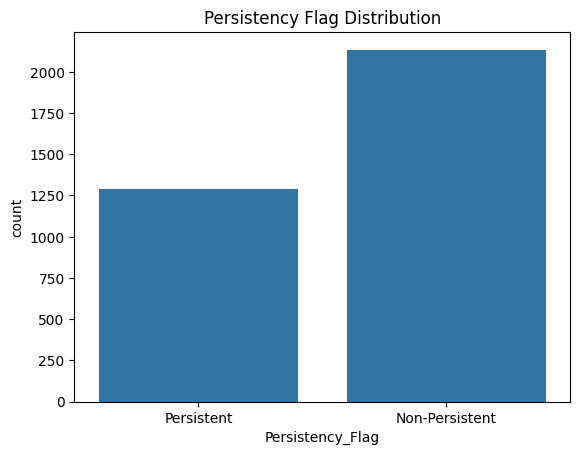

In [32]:
#Class distribution check for imbalance
if "Persistency_Flag" in df.columns:
    print("\nTarget Variable Distribution:")
    print(df["Persistency_Flag"].value_counts())
    sns.countplot(x="Persistency_Flag", data=df)
    plt.title("Persistency Flag Distribution")
    plt.show()

<h3 style="color: darkblue; text-align: left;">Encoding</h3>

In [33]:

from sklearn.preprocessing import LabelEncoder

# Step 1: Identify Y/N columns (binary risk factors)
yn_cols = [col for col in df.columns if df[col].nunique() == 2 and set(df[col].unique()) <= {'Y', 'N'}]

# Binary encode Y/N columns
for col in yn_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0})

# Step 2: Identify remaining object (non-numeric) columns for label encoding
non_numeric_cols = df.select_dtypes(include='object').columns
cat_cols = [col for col in non_numeric_cols if col not in yn_cols and col != 'Ptid']  # Exclude ID column

# Step 3: Apply label encoding to non-ordinal categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for use in prediction/deployment

# Optional: Print results
print("Binary Encoded Columns:", yn_cols)
print("Label Encoded Columns:", cat_cols)




Binary Encoded Columns: ['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 'Concom_

In [34]:
yn_cols

['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [35]:
cat_cols

['Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag']

In [36]:
df

Ptid  Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0        P1                 1       1     2          1       4           3   
1        P2                 0       1     1          1       4           0   
2        P3                 0       0     3          0       0           1   
3        P4                 0       0     2          1       0           3   
4        P5                 0       0     2          1       0           3   
...     ...               ...     ...   ...        ...     ...         ...   
3419  P3420                 1       0     2          1       3           3   
3420  P3421                 1       0     2          1       3           3   
3421  P3422                 1       0     2          1       3           3   
3422  P3423                 0       0     2          1       3           0   
3423  P3424                 0       0     2          1       3           1   

      Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  ...  \
0                  5                    0                      1  ...   
1                  5                    0                      1  ...   
2                  5                    0                      1  ...   
3                  5                    0                      1  ...   
4                  5                    0                      1  ...   
...              ...                  ...                    ...  ...   
3419               5                    0                      1  ...   
3420              34                    0                      1  ...   
3421               3                    1                      0  ...   
3422              34                    0                      1  ...   
3423              34                    0                      1  ...   

      Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                           0                             0   
1                           0                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   
...                       ...                           ...   
3419                        0                             1   
3420                        0                             0   
3421                        0                             1   
3422                        0                             0   
3423                        0                             1   

      Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
3419                         0                        0   
3420                         0                        0   
3421                         0                        0   
3422                         0                        0   
3423                         0                        0   

      Risk_Hysterectomy_Oophorectomy  Risk_Estrogen_Deficiency  \
0                                  0                         0   
1                                  0                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   
...                              ...                       ...   
3419                               0                         0   
3420                               0                         0   
3421                               0                         0   
3422                               0                         0   
3

<h3 style="color: darkblue; text-align: left;">EDA(Exploratory Data Analysis)</h3>

#Basic Dataset Overview

In [37]:
# Dataset Shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 3424, Columns: 69


In [38]:
# Data Types and Missing Values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Ptid                                                                3424 non-null   object 
 1   Persistency_Flag                                                    3424 non-null   int32  
 2   Gender                                                              3424 non-null   int32  
 3   Race                                                                3424 non-null   int32  
 4   Ethnicity                                                           3424 non-null   int32  
 5   Region                                                              3424 non-null   int32  
 6   Age_Bucket                                                          3424 non-null   int32  
 7   Ntm_Speciality 

In [39]:
import pandas as pd

# Create a structured summary similar to df.info()
info_data = {
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
}

# Convert to DataFrame
info_df = pd.DataFrame(info_data)

# Export to Excel
info_df.to_excel("df_info_structured.xlsx", index=False)

 Target Variable Distribution

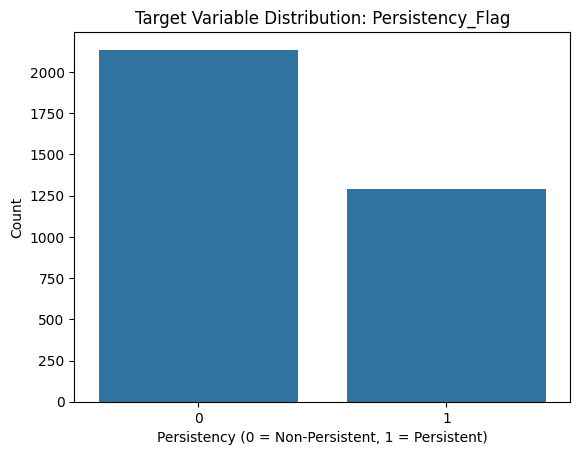

Persistency_Flag
0    2135
1    1289
Name: count, dtype: int64


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Persistency_Flag')
plt.title('Target Variable Distribution: Persistency_Flag')
plt.xlabel('Persistency (0 = Non-Persistent, 1 = Persistent)')
plt.ylabel('Count')
plt.show()

print(df['Persistency_Flag'].value_counts())

Categorical Feature Distributions

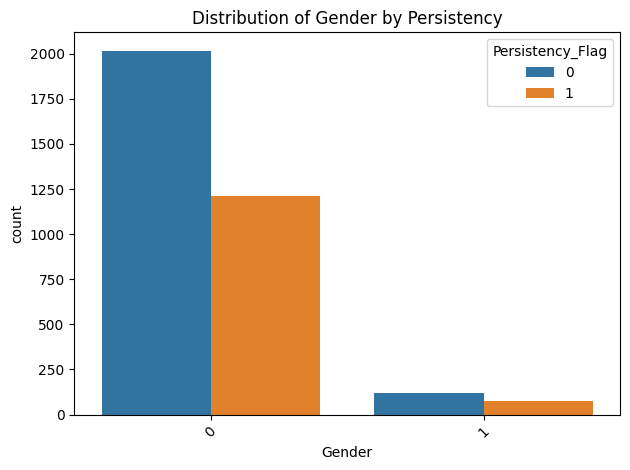

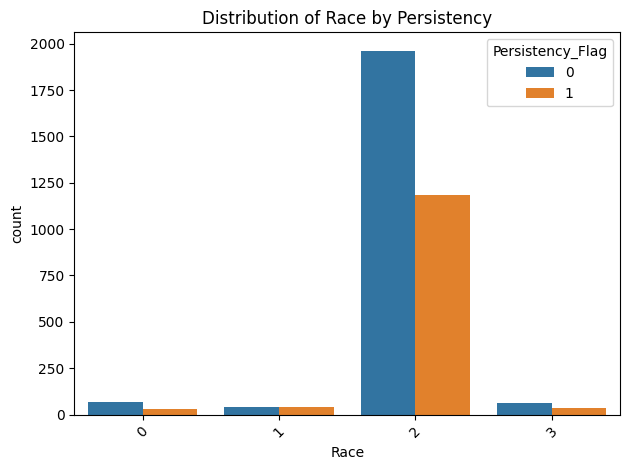

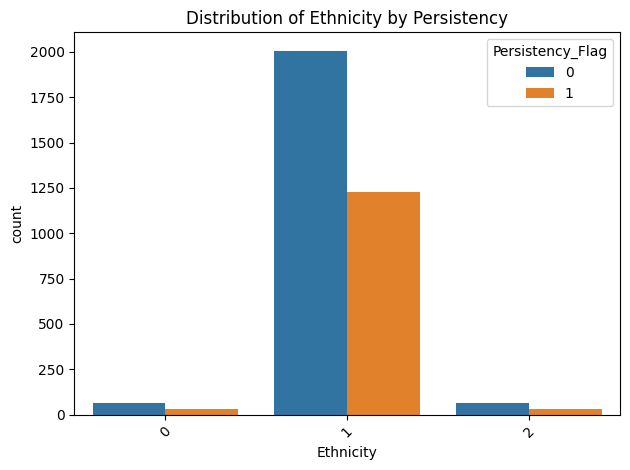

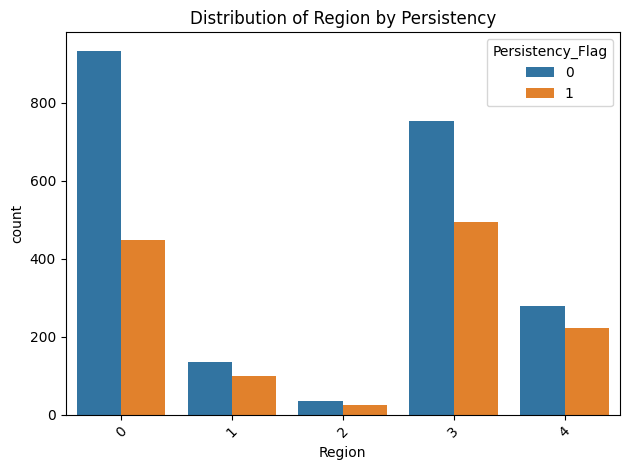

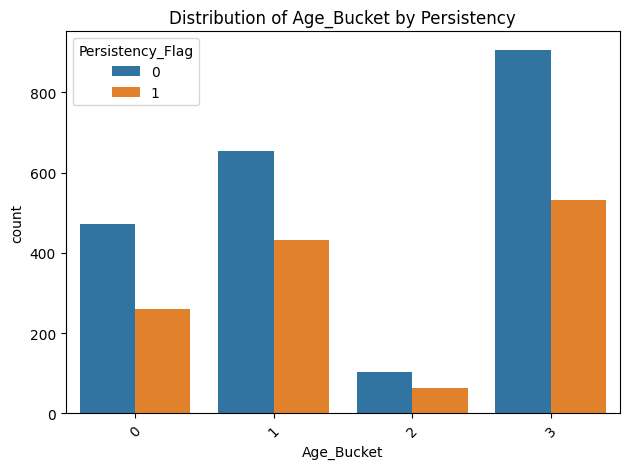

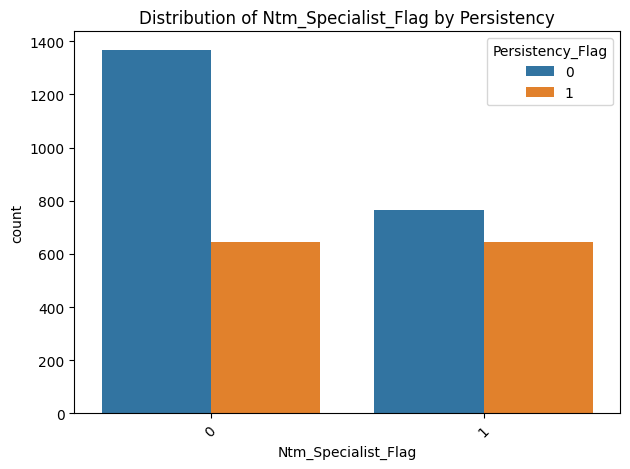

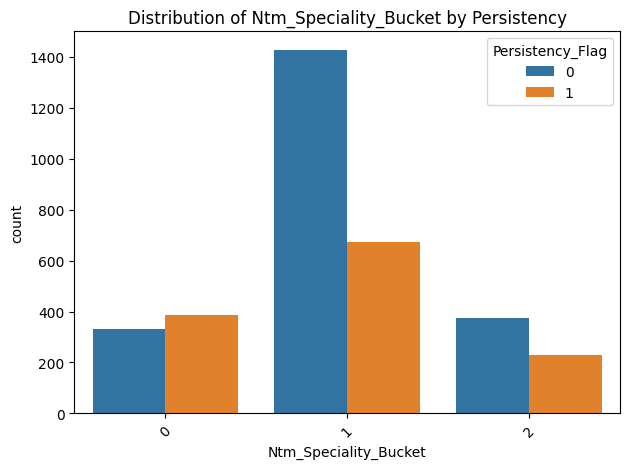

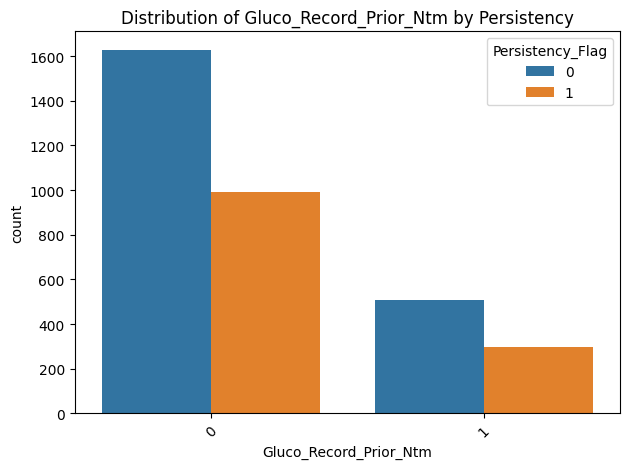

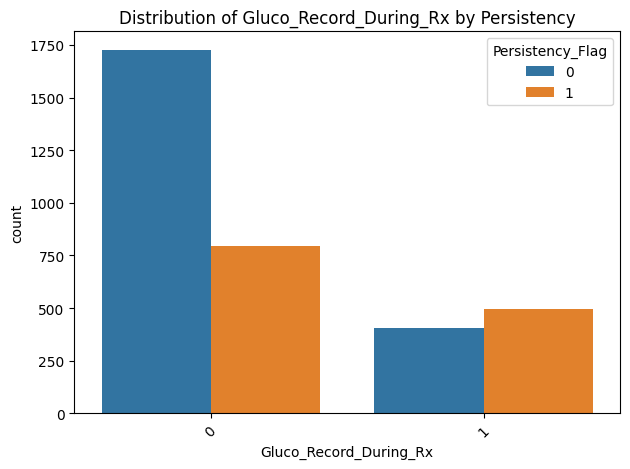

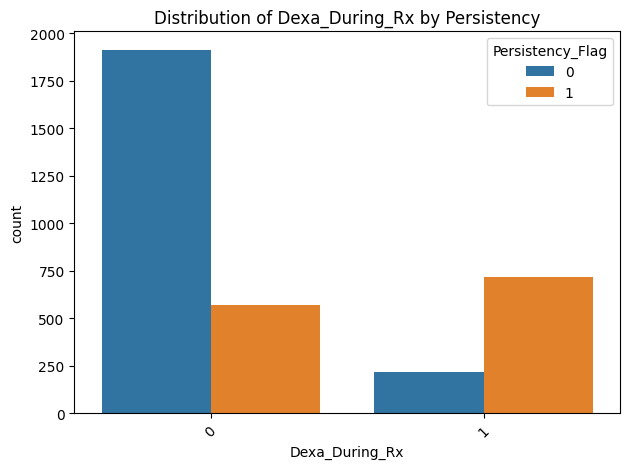

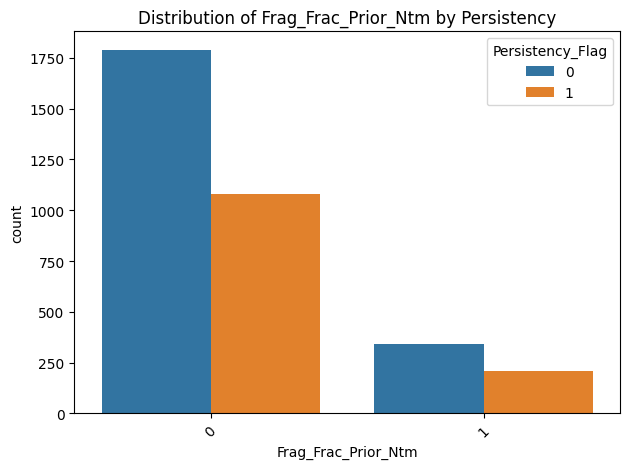

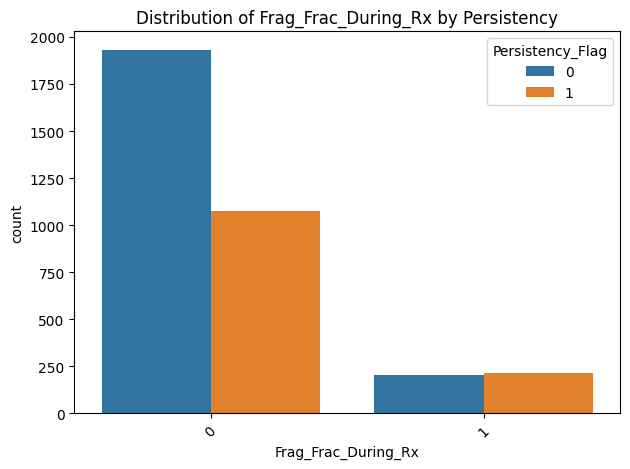

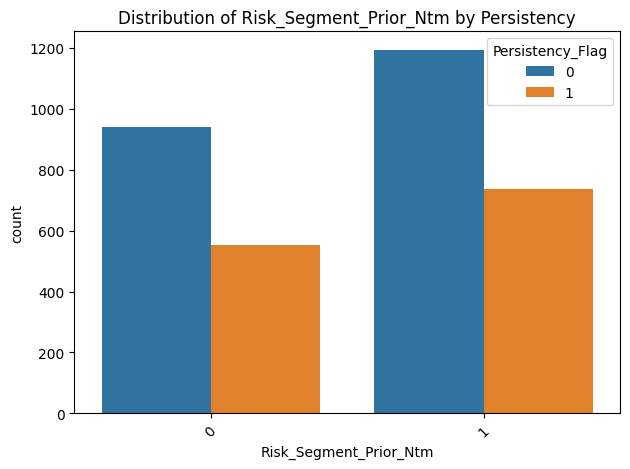

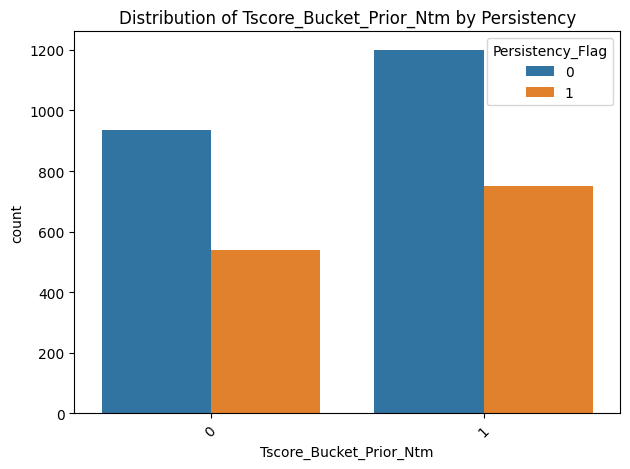

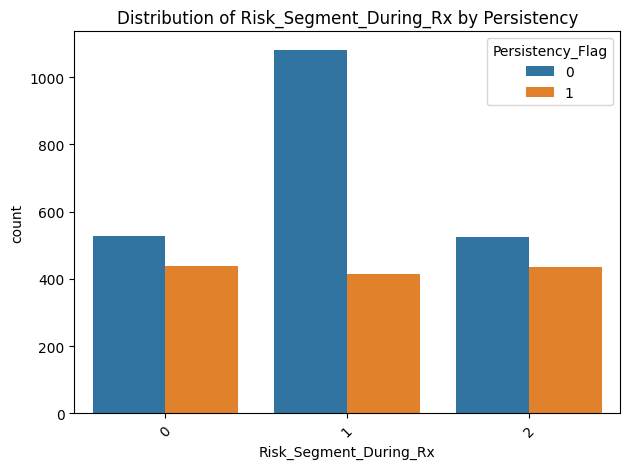

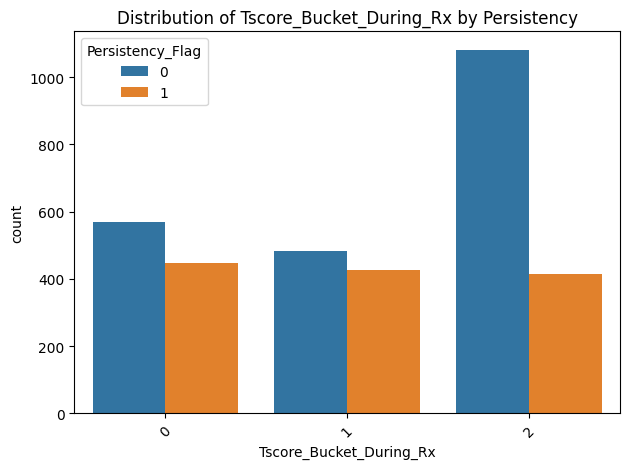

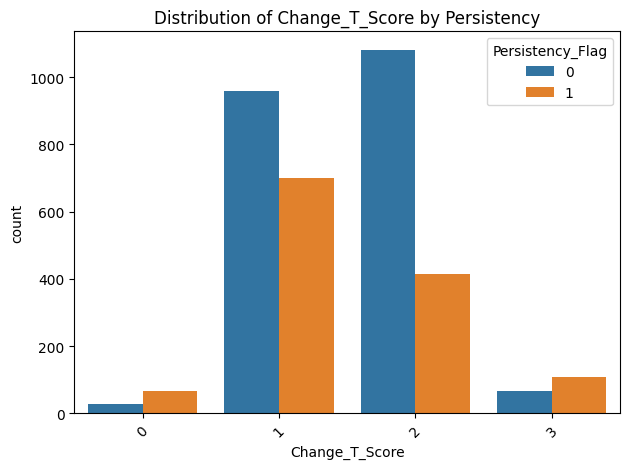

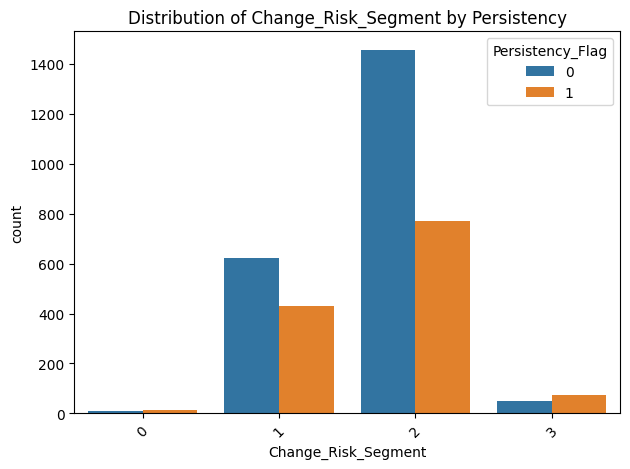

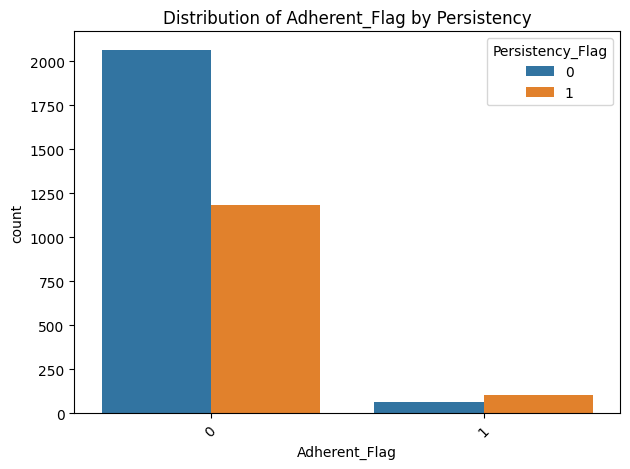

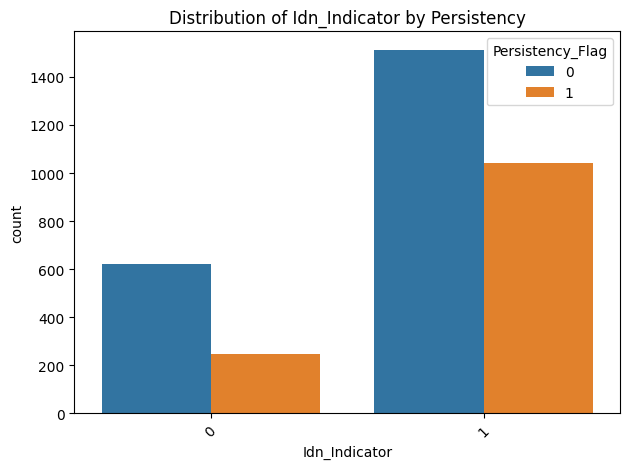

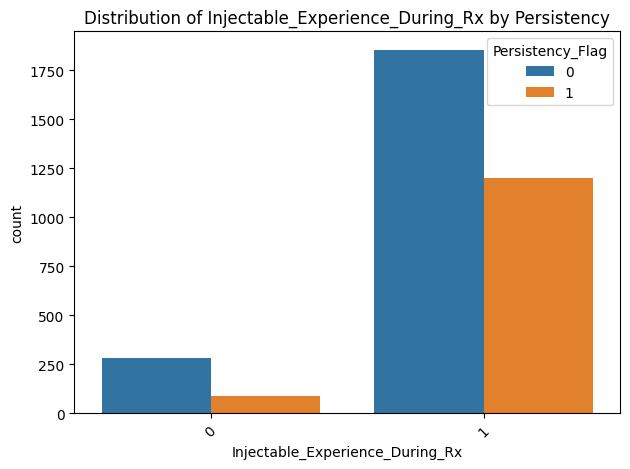

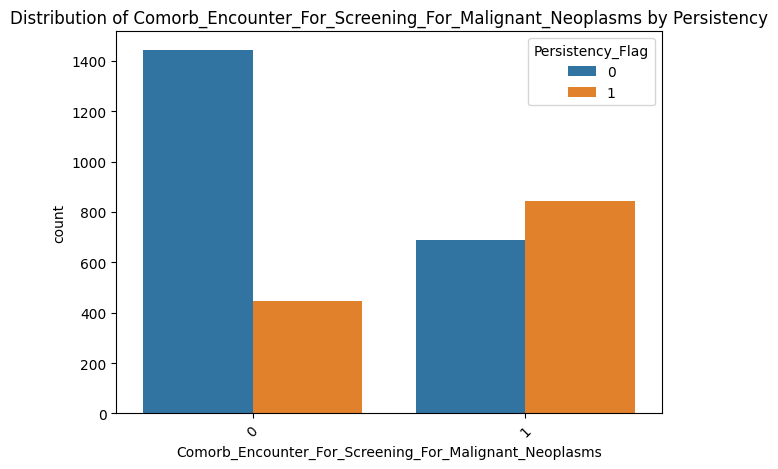

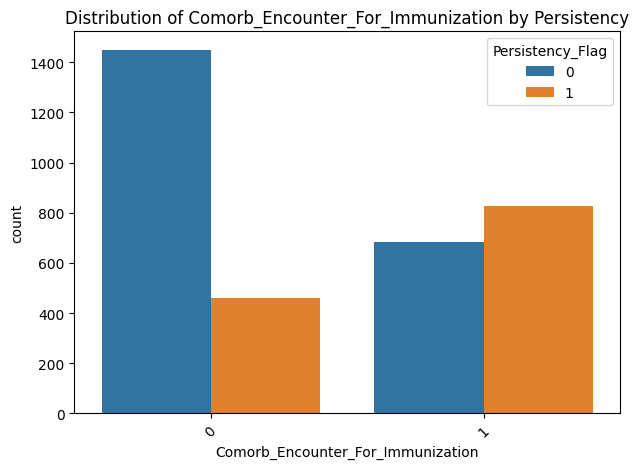

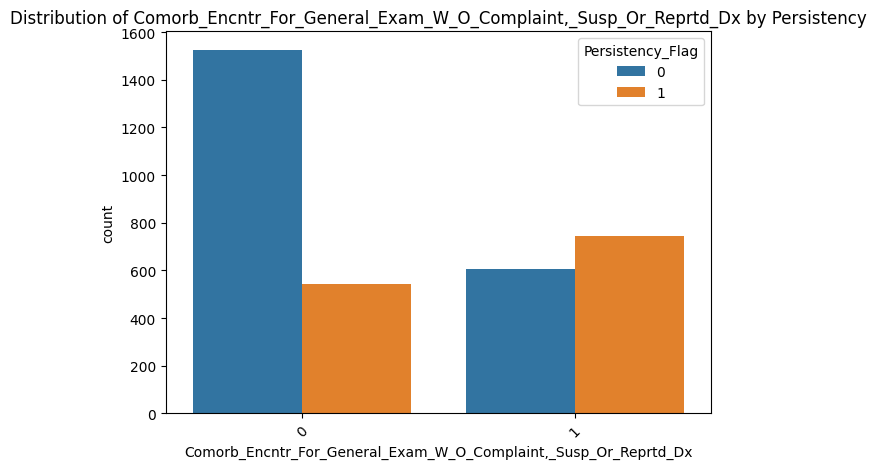

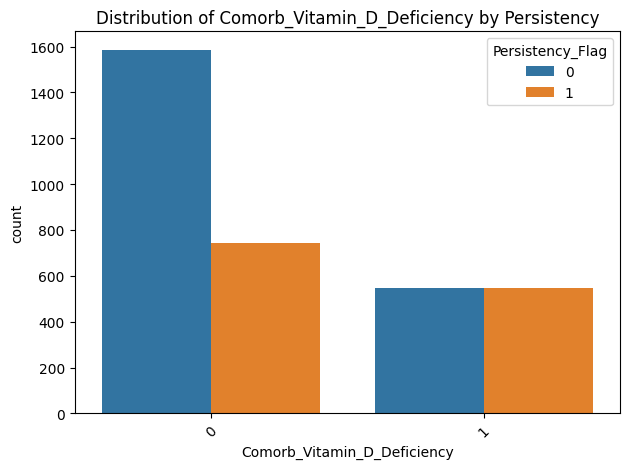

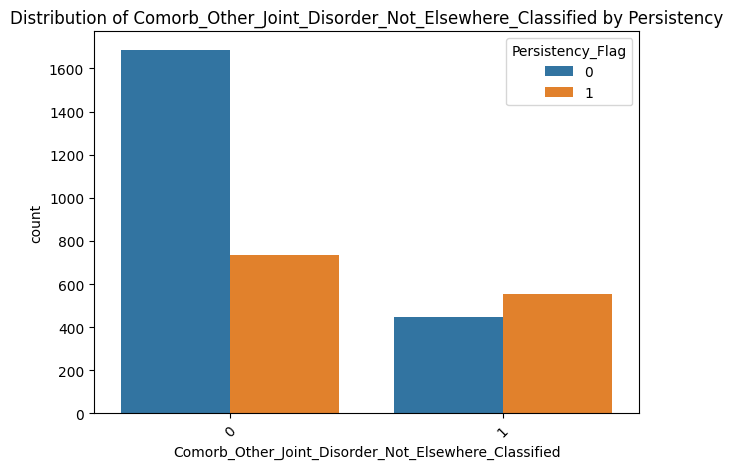

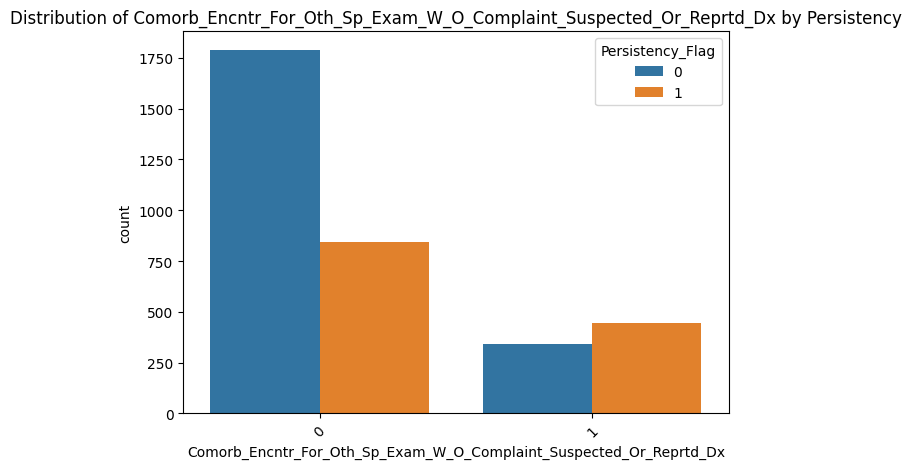

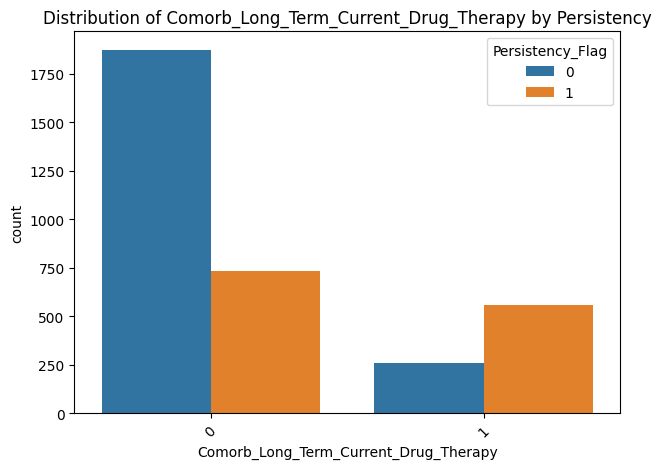

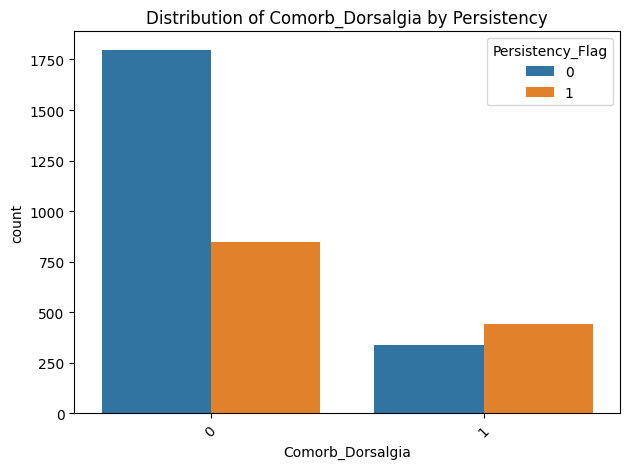

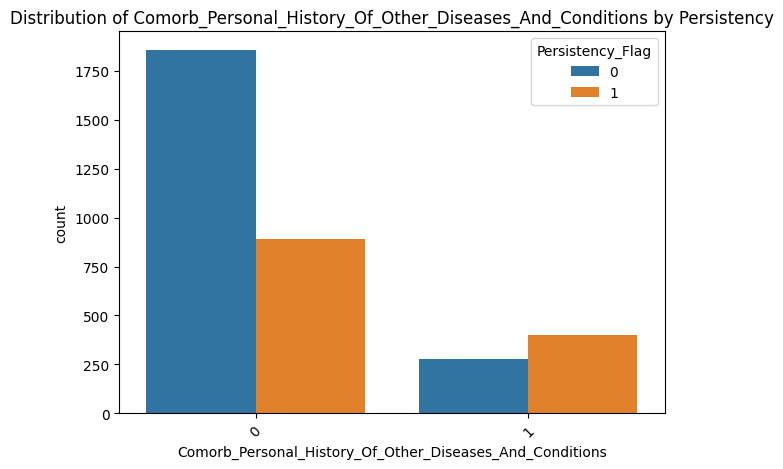

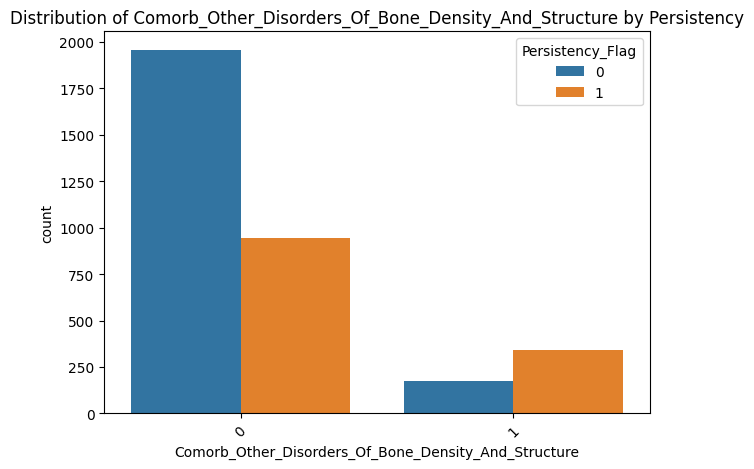

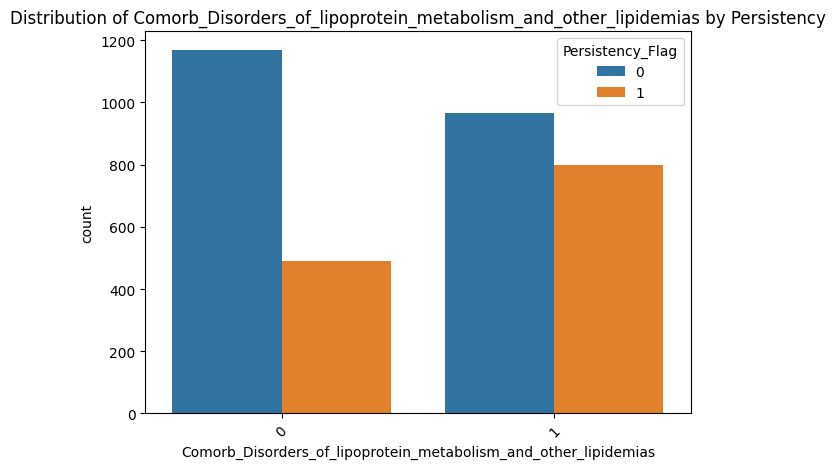

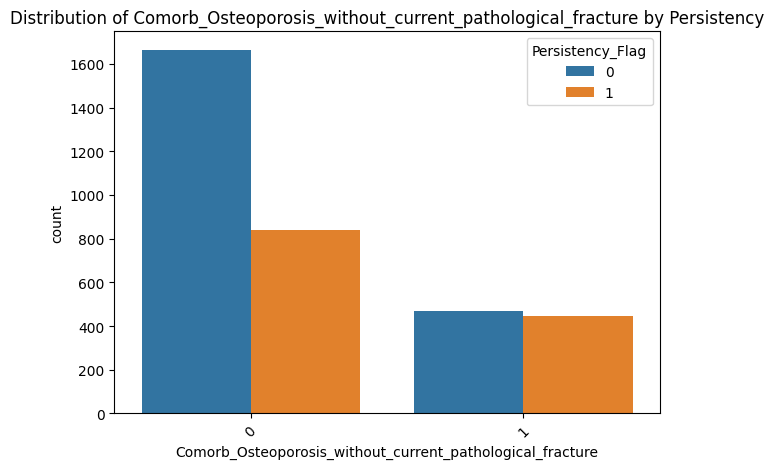

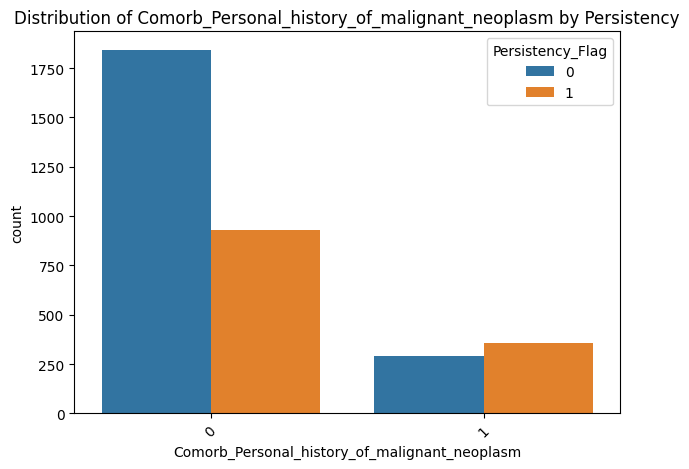

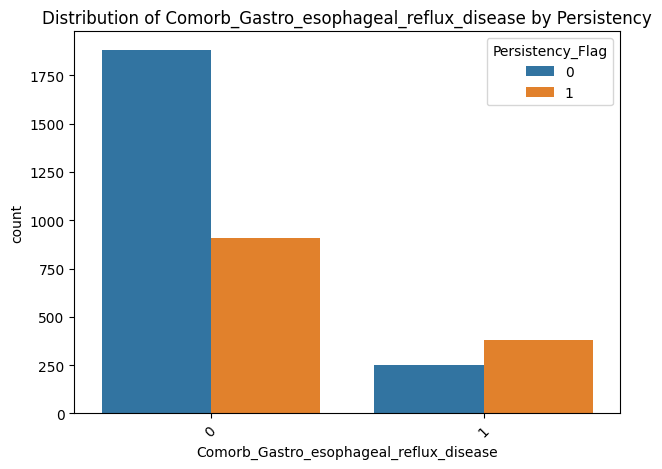

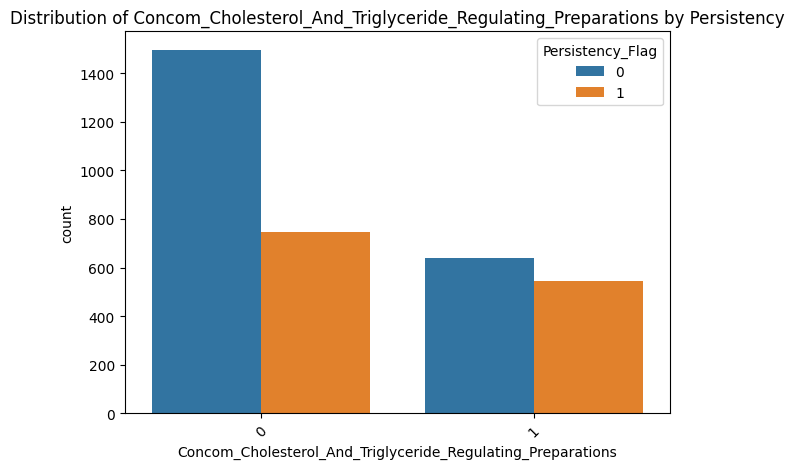

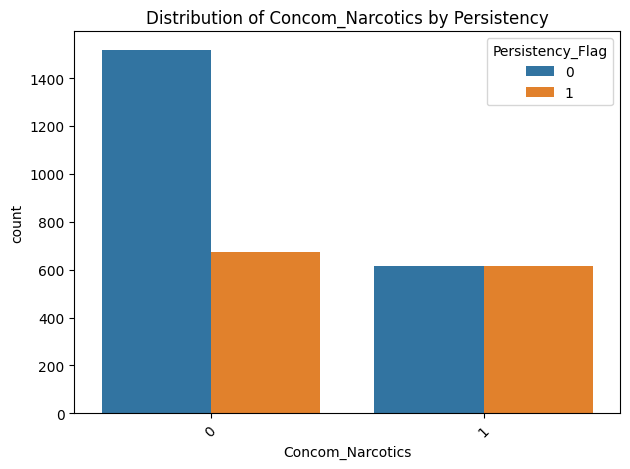

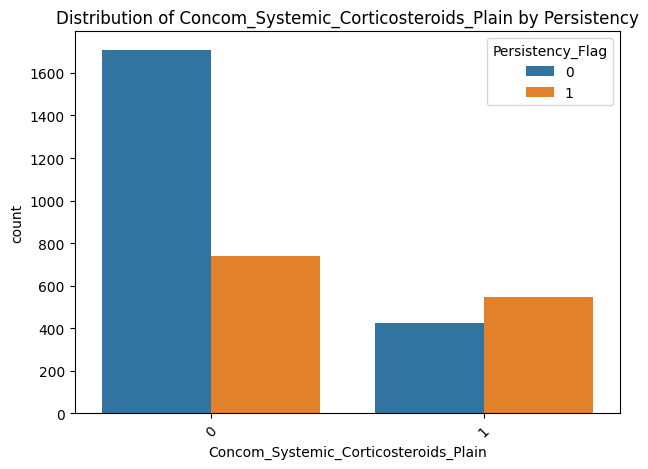

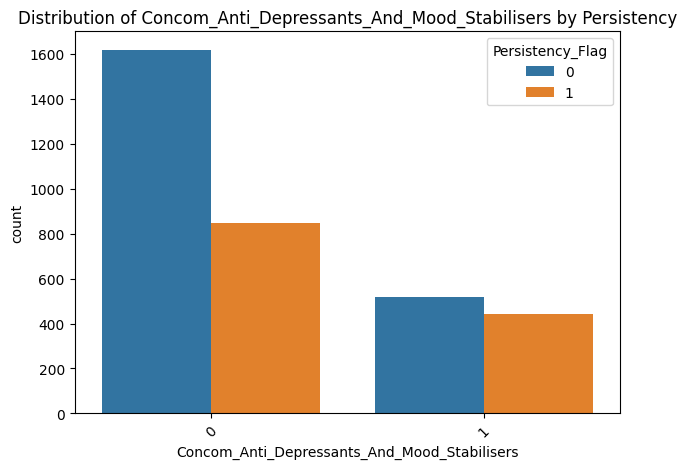

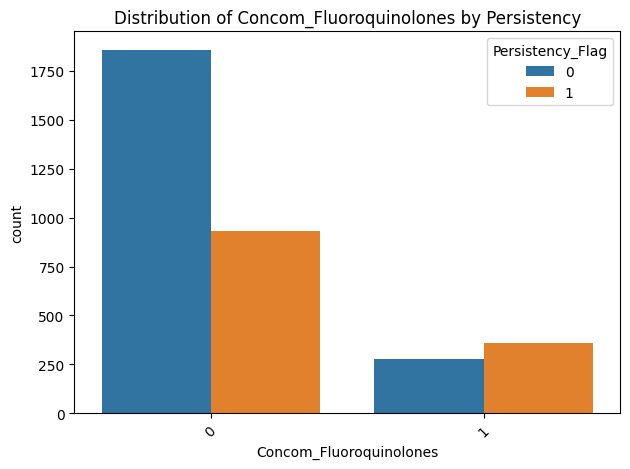

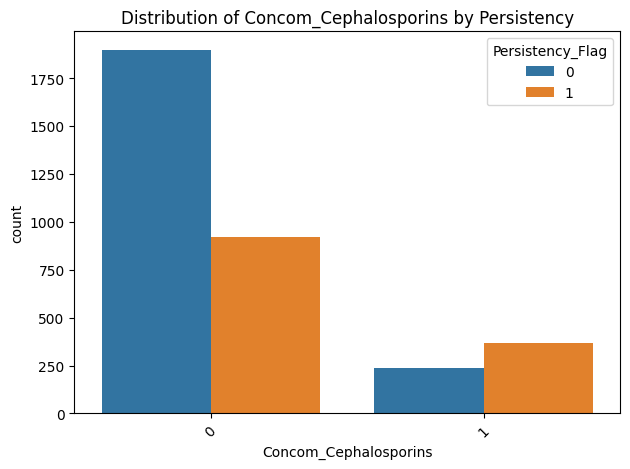

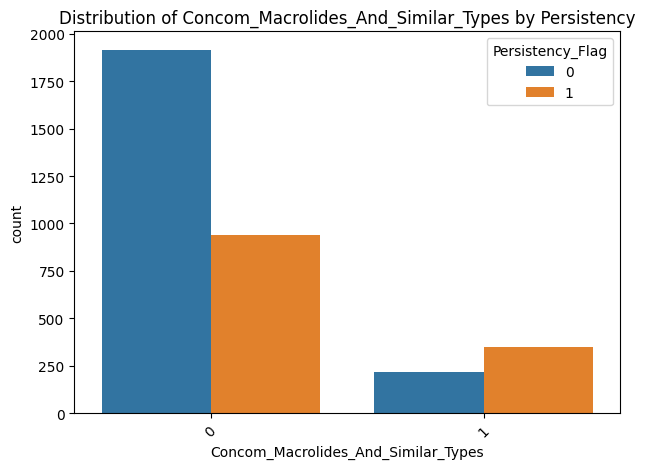

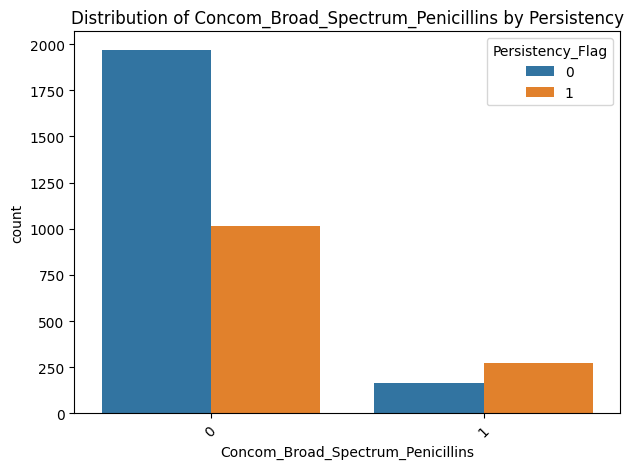

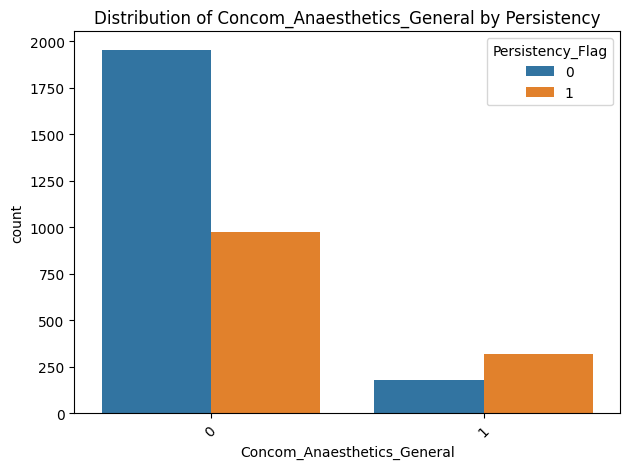

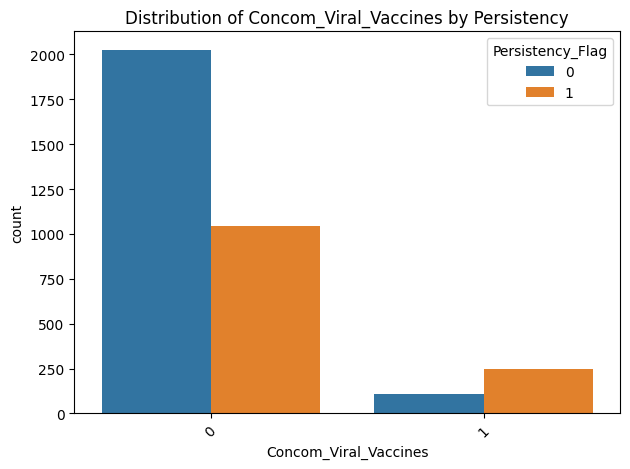

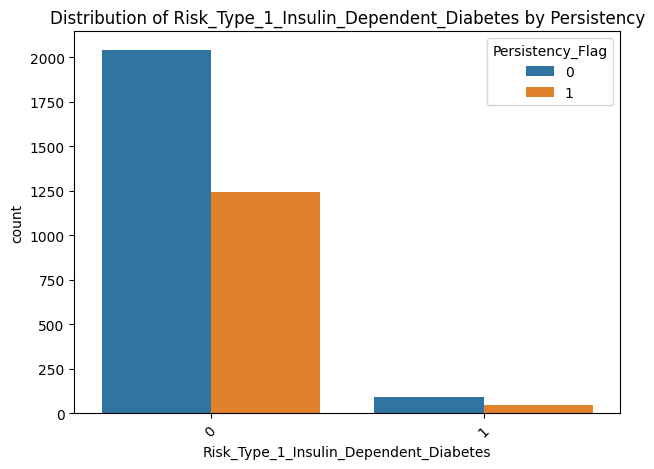

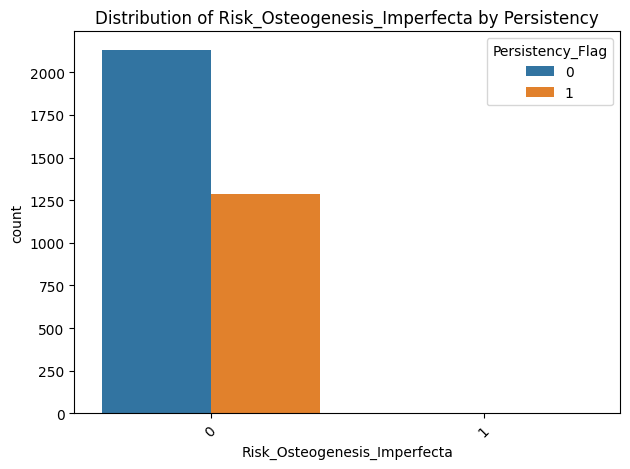

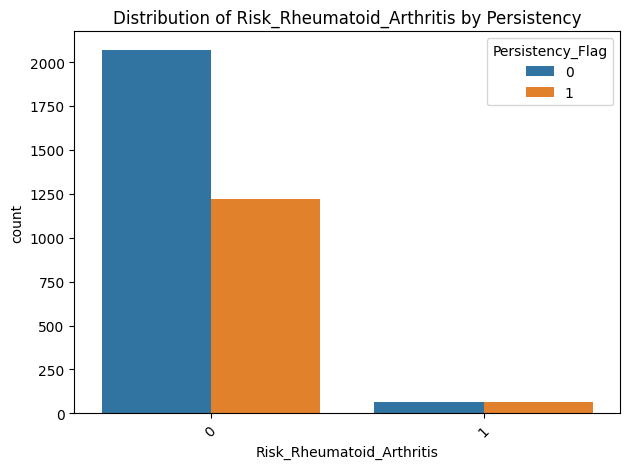

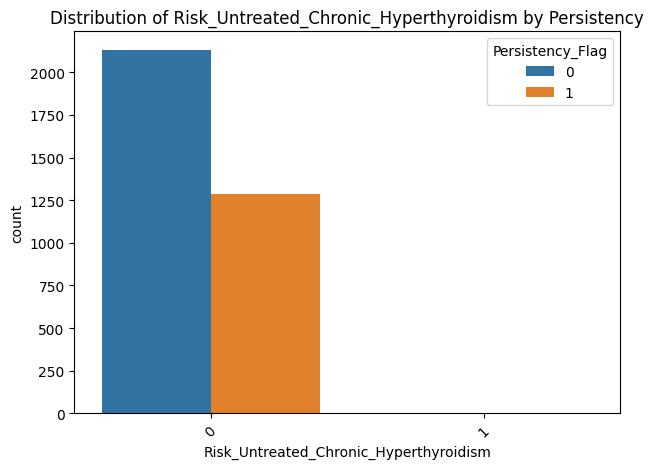

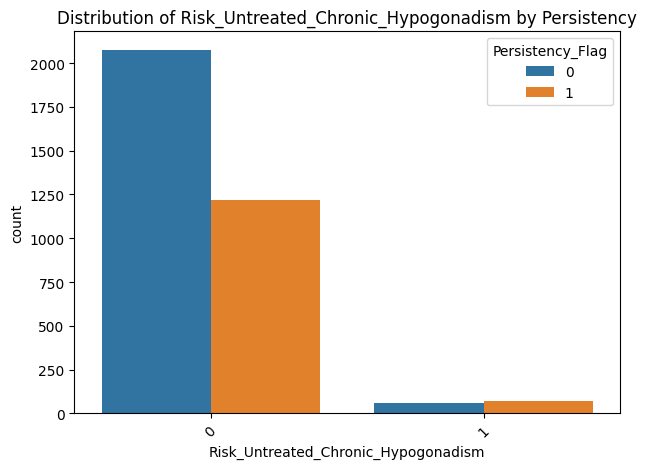

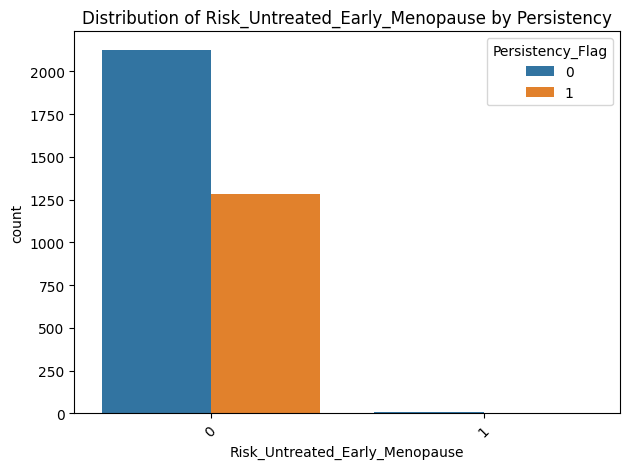

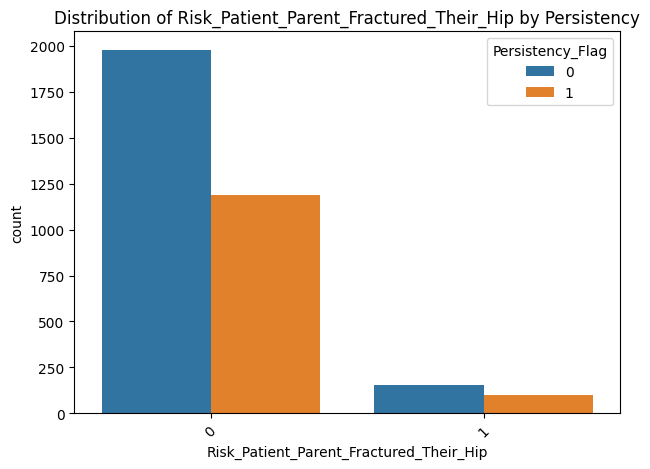

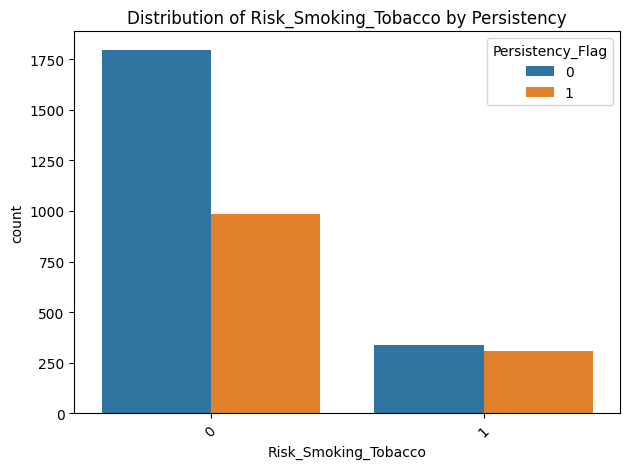

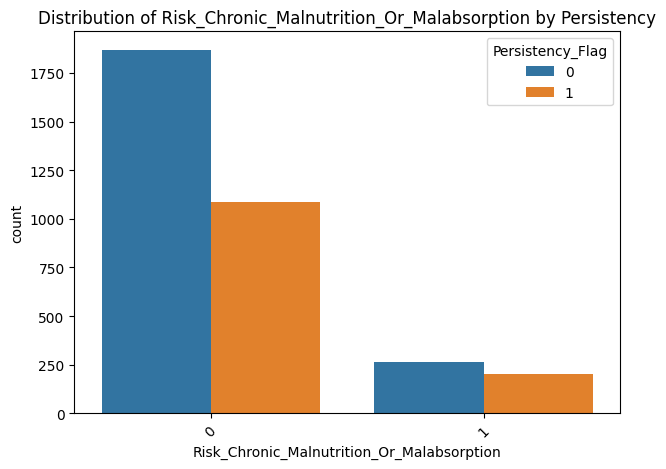

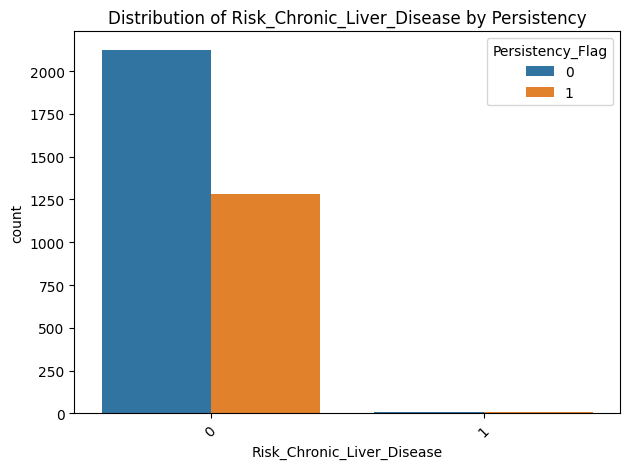

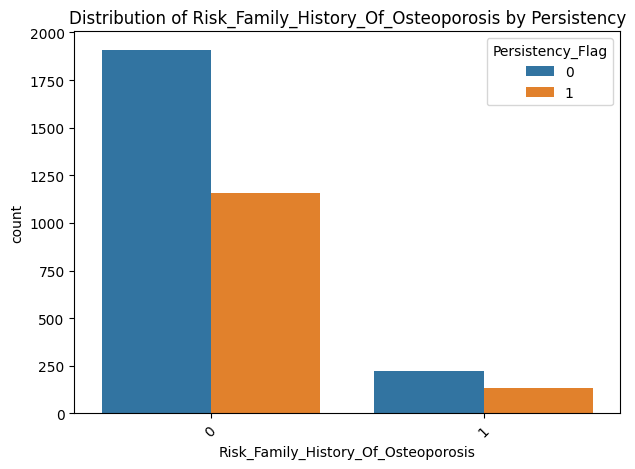

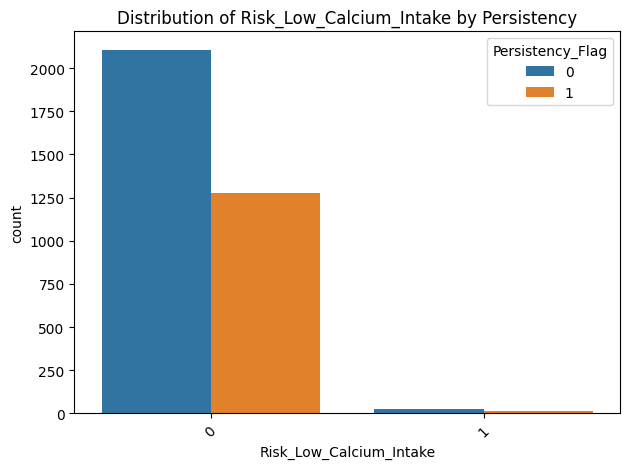

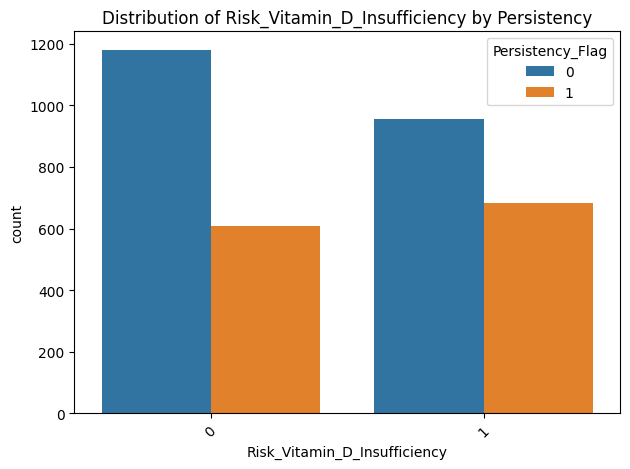

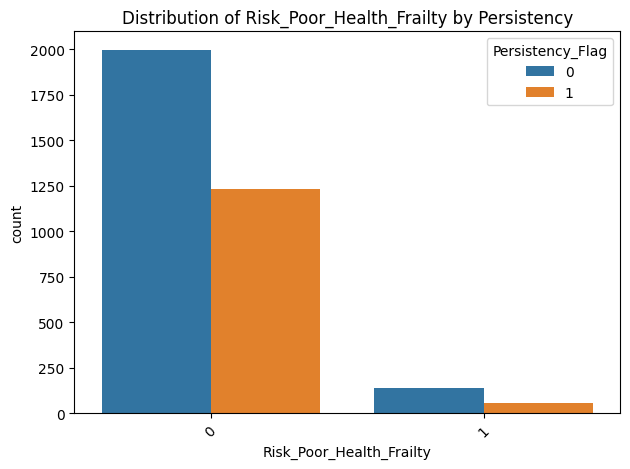

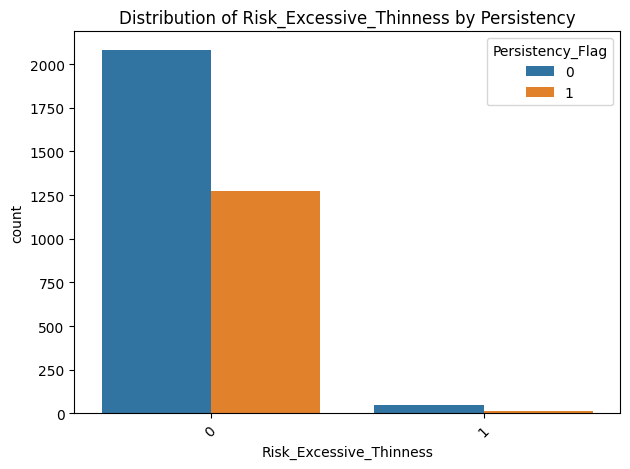

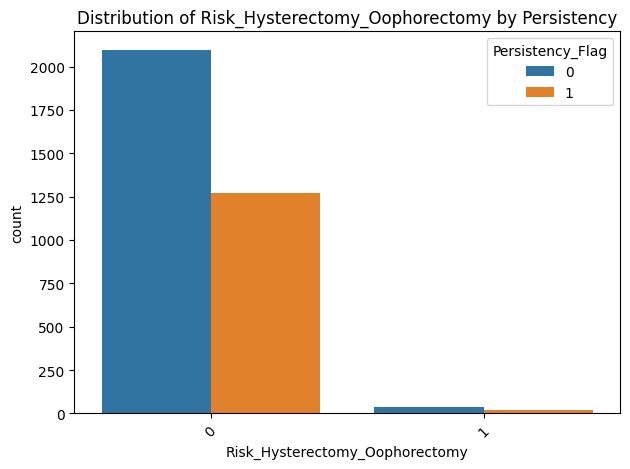

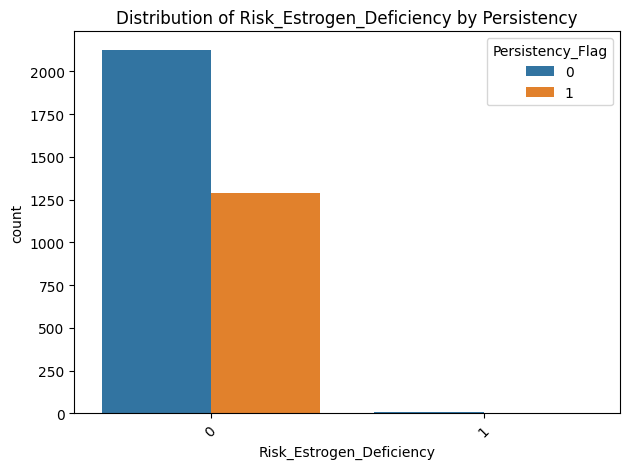

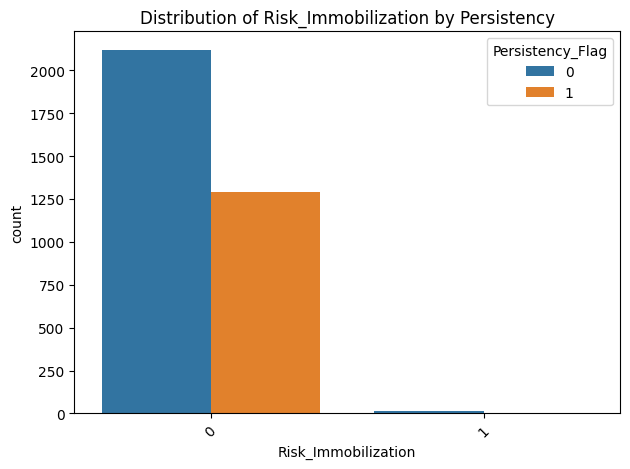

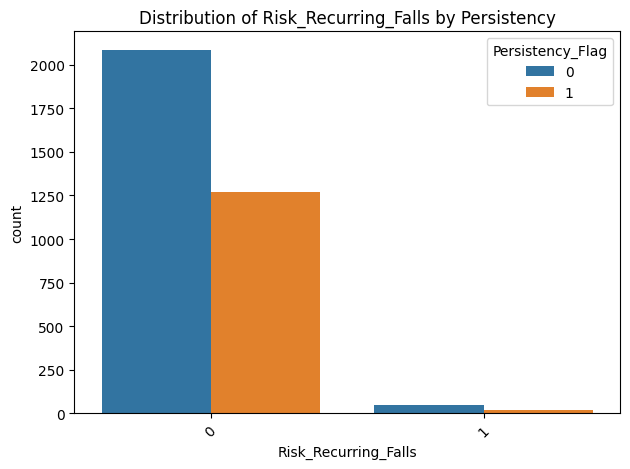

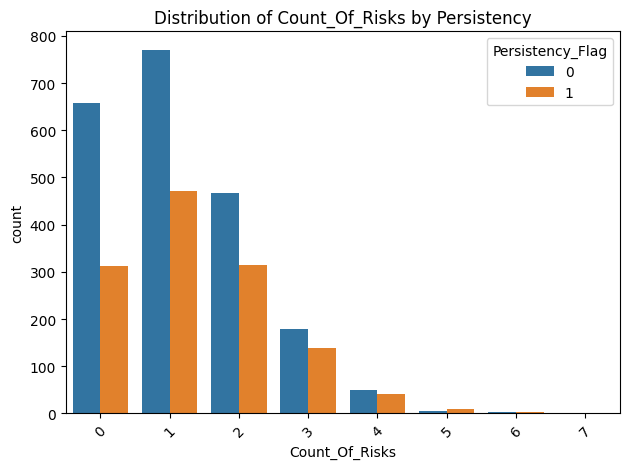

In [41]:
cat_cols = df.select_dtypes(include=['int', 'object']).columns.drop(['Persistency_Flag'])

for col in cat_cols:
    if df[col].nunique() < 10:
        sns.countplot(data=df, x=col, hue='Persistency_Flag')
        plt.title(f'Distribution of {col} by Persistency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Numeric Feature Distributions + Outliers

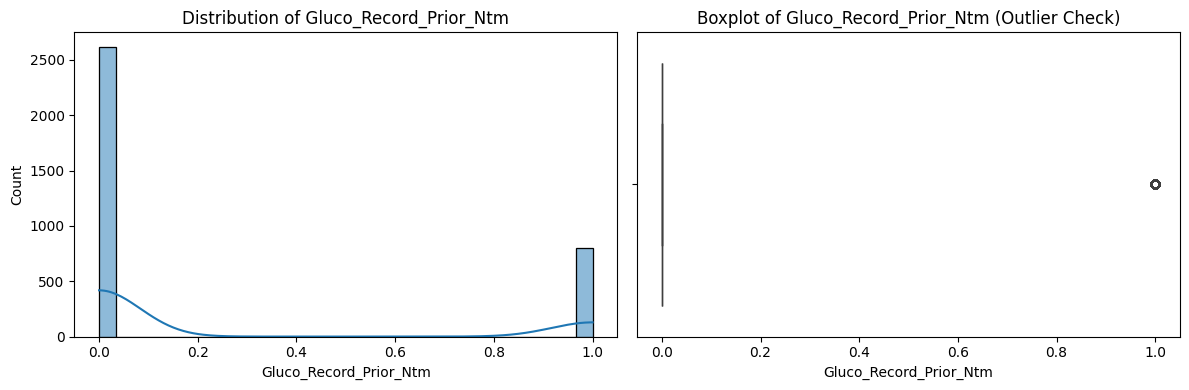

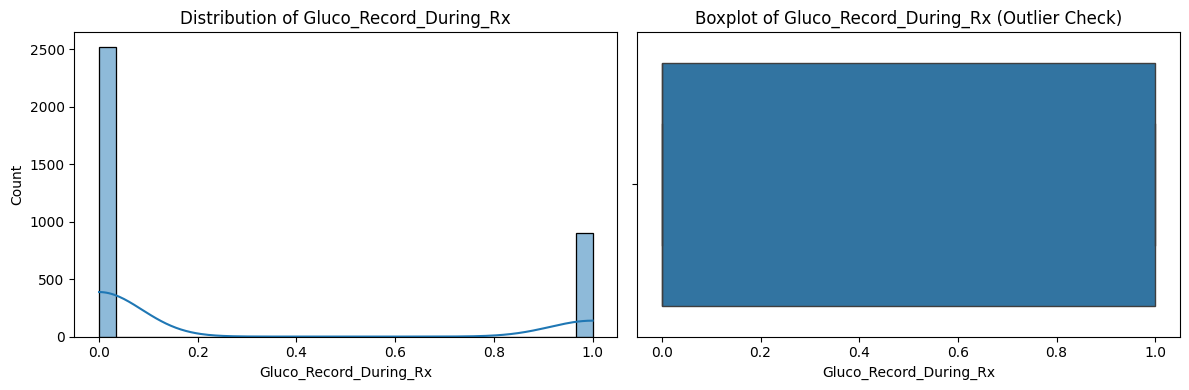

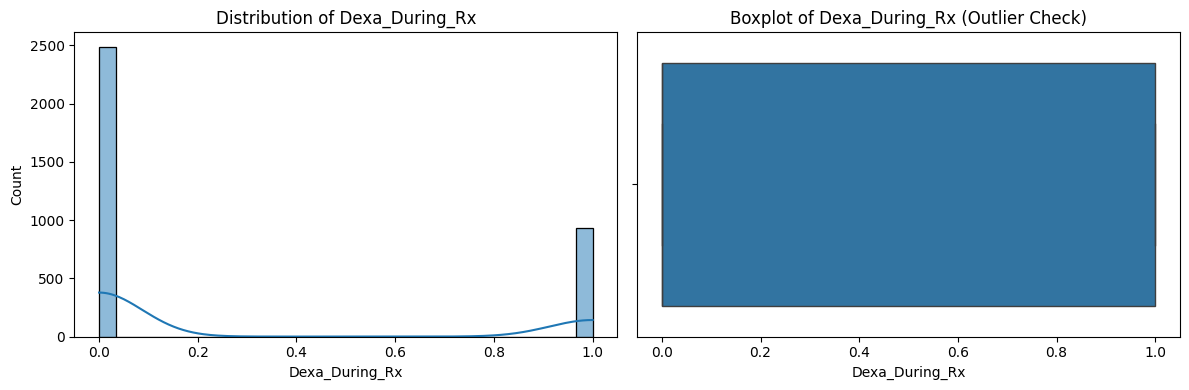

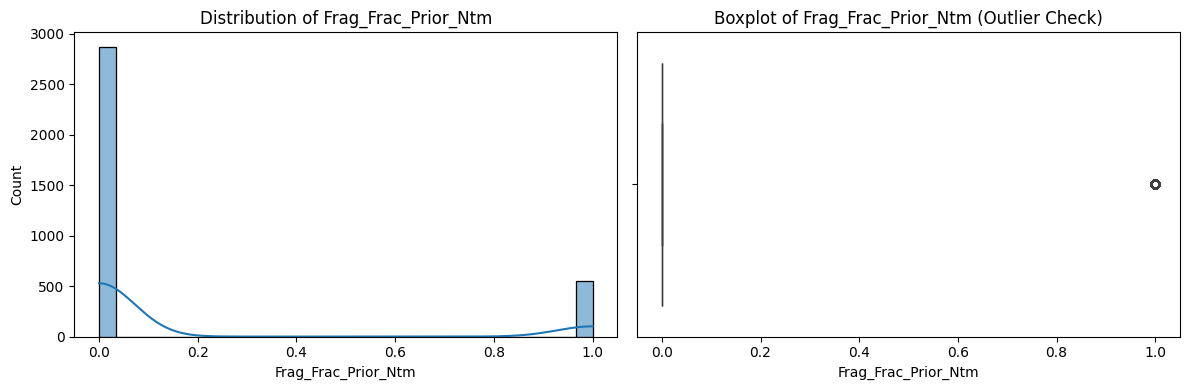

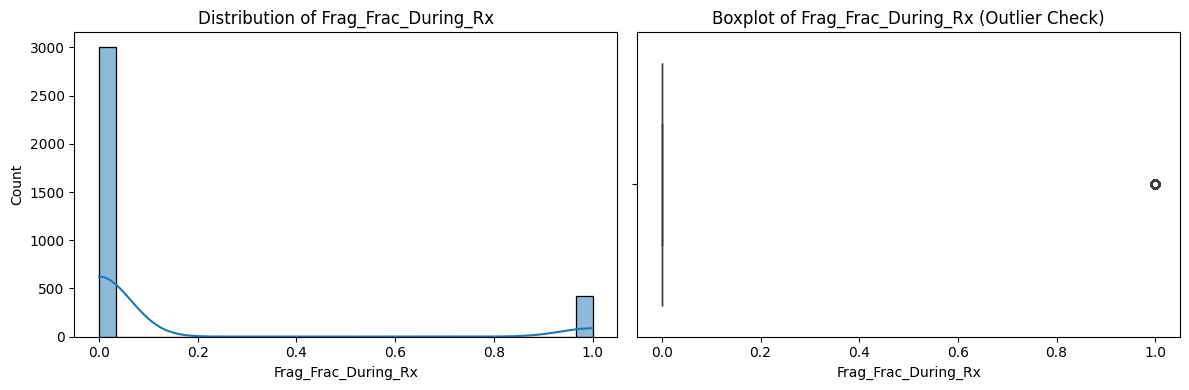

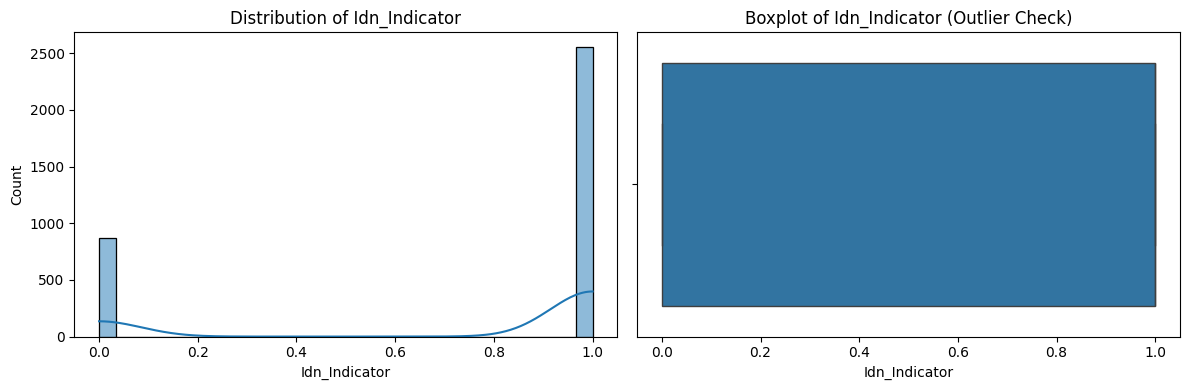

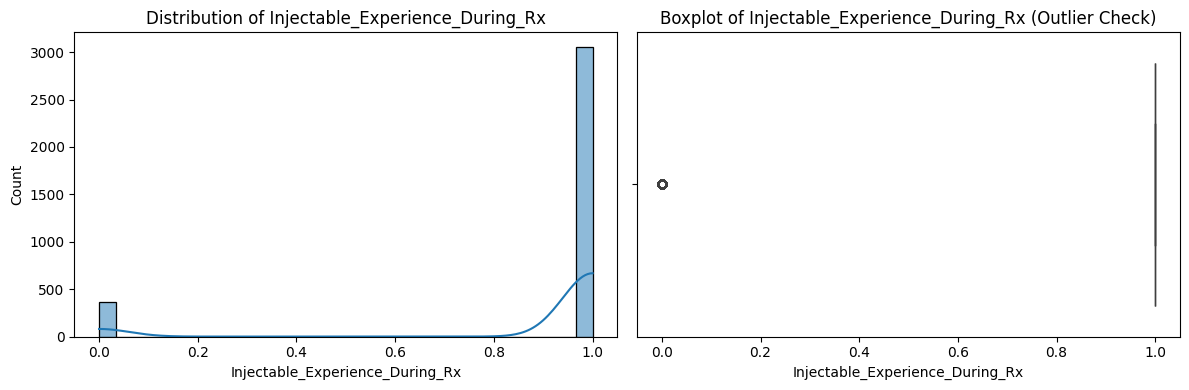

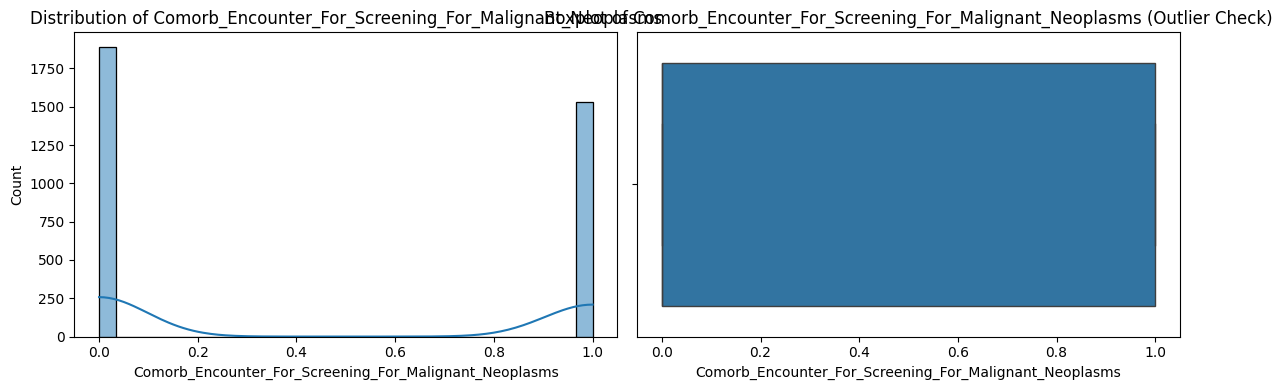

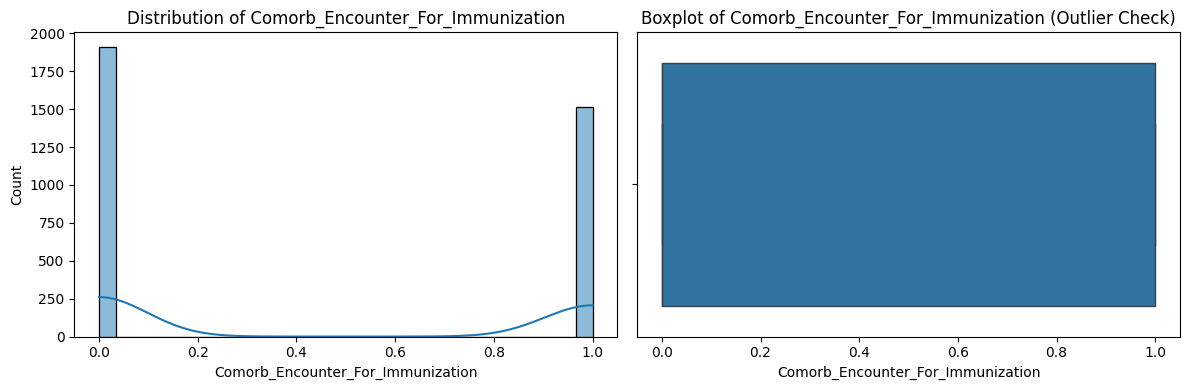

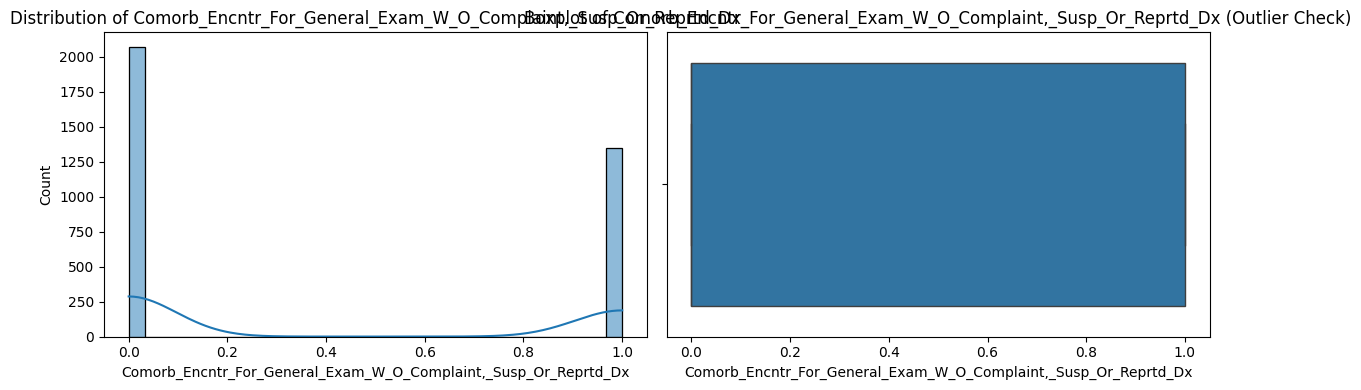

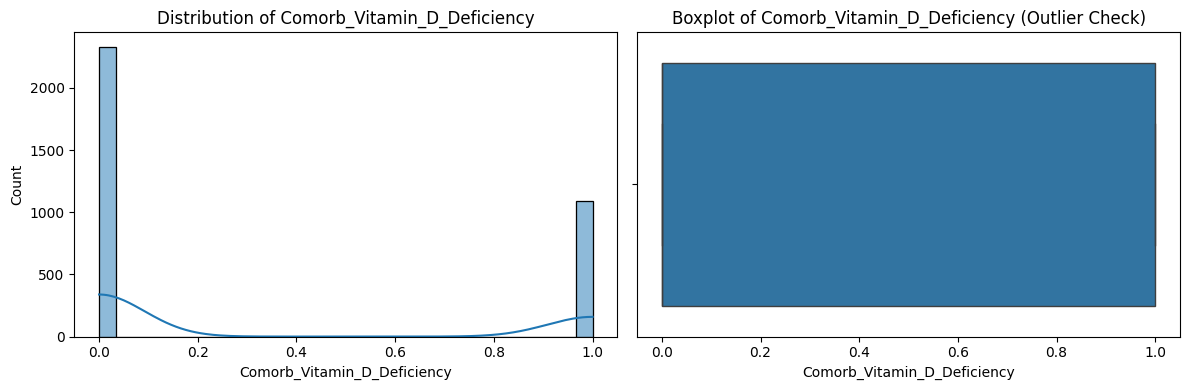

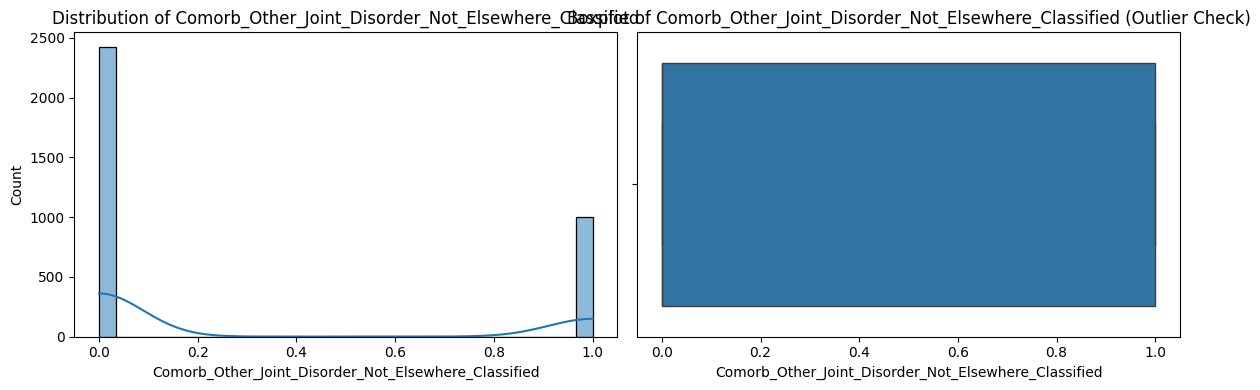

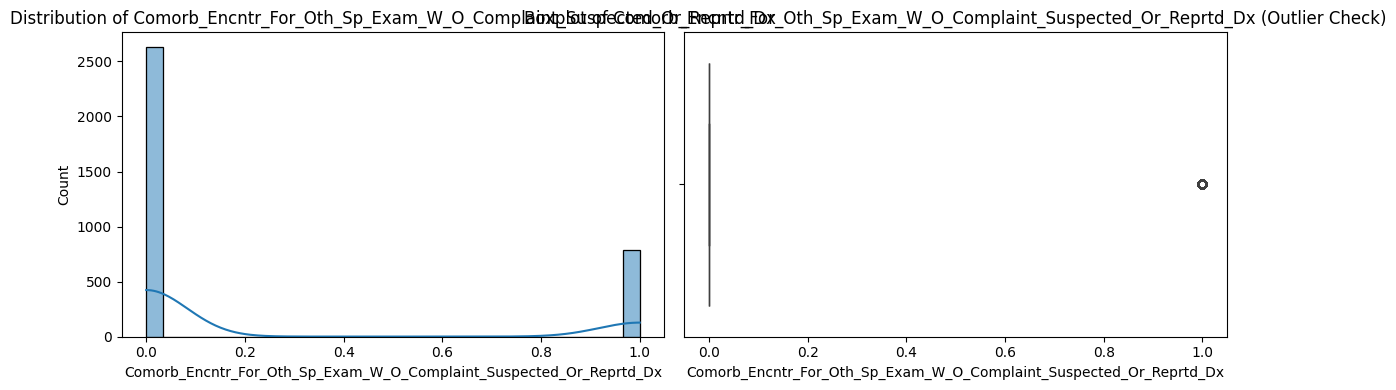

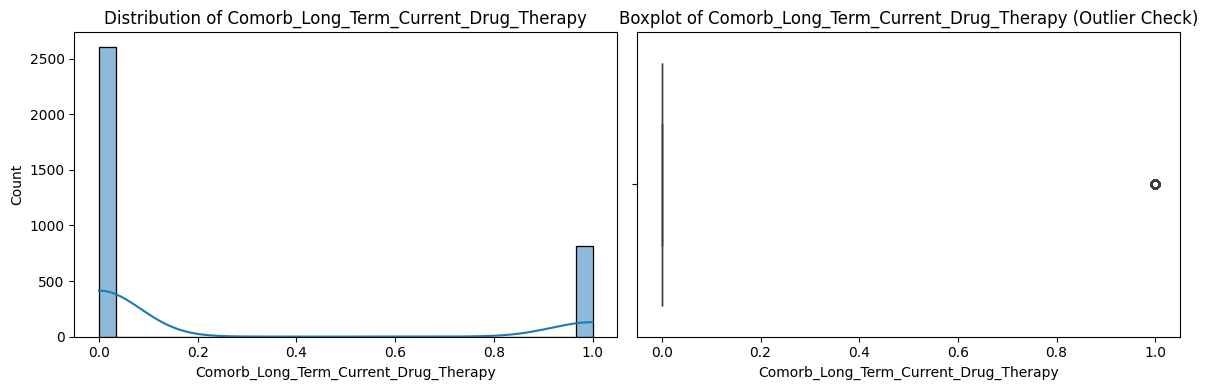

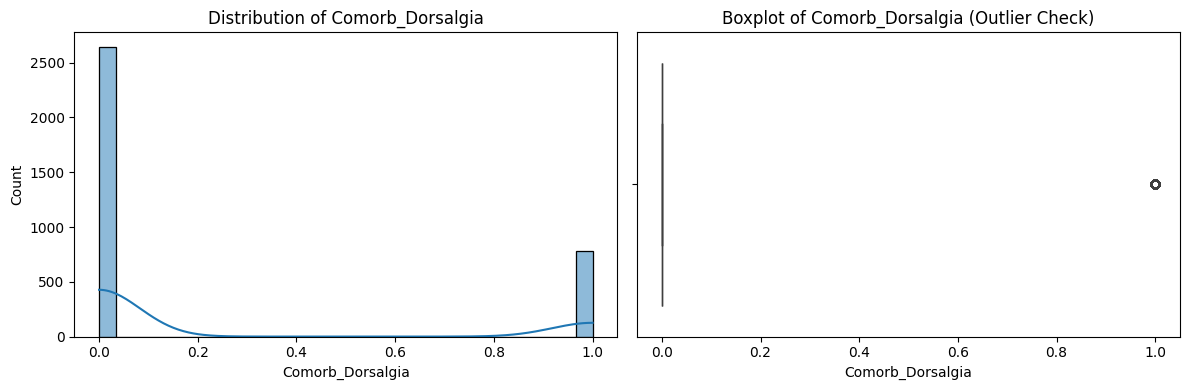

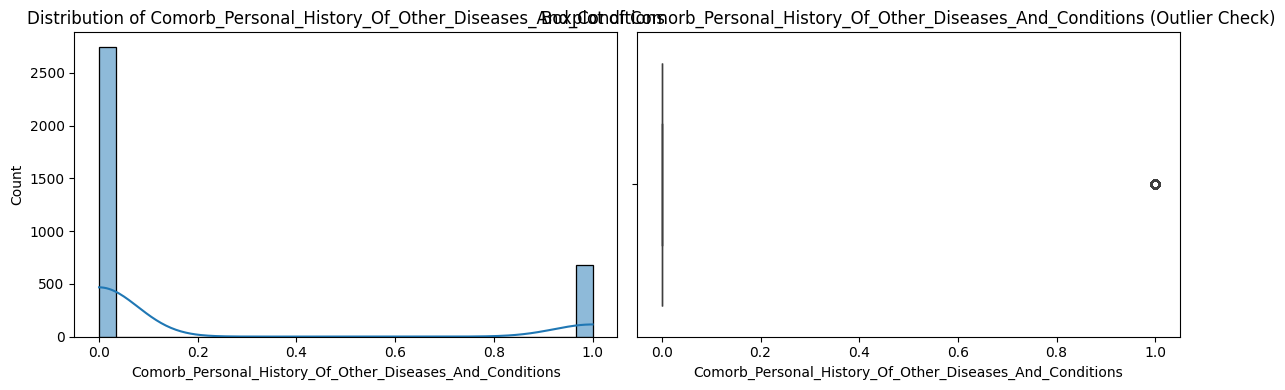

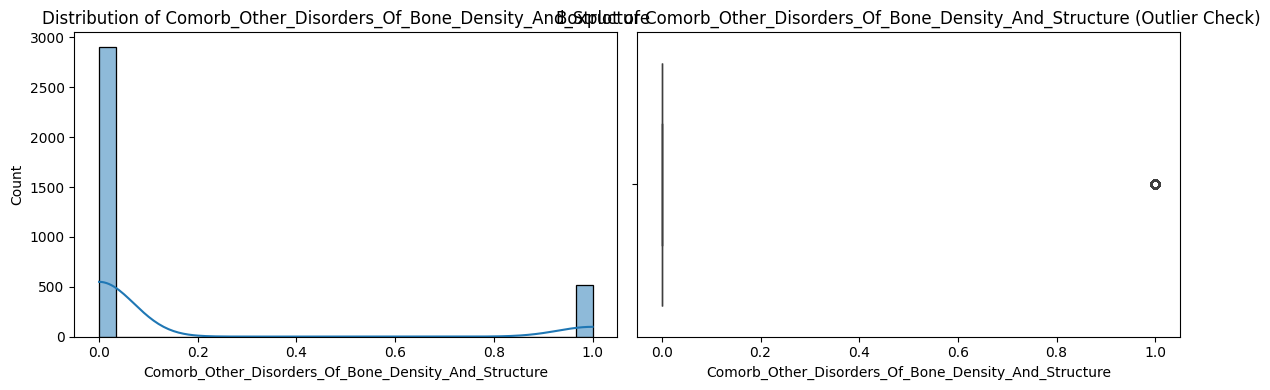

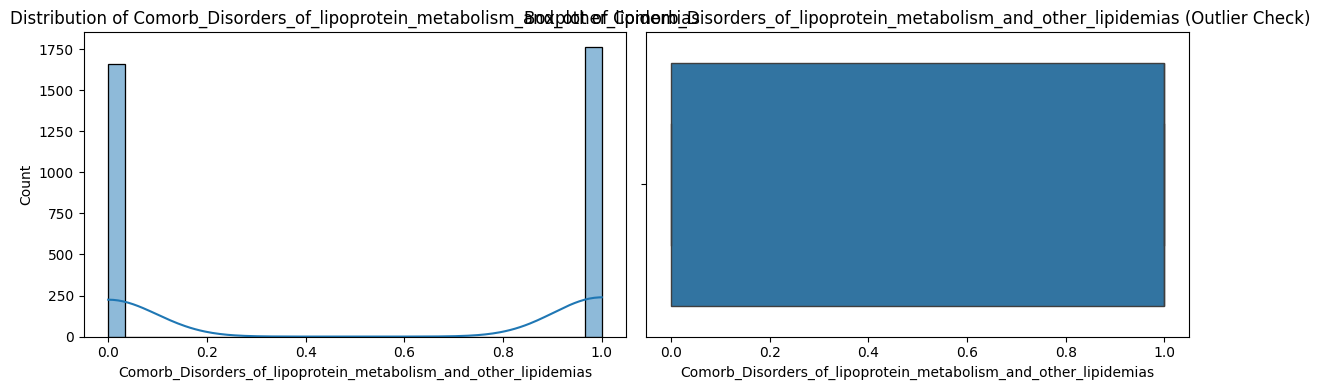

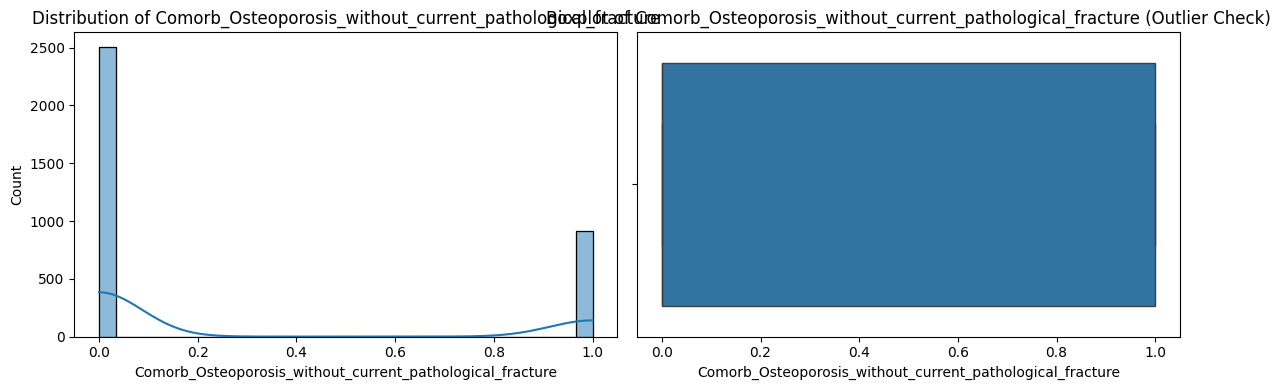

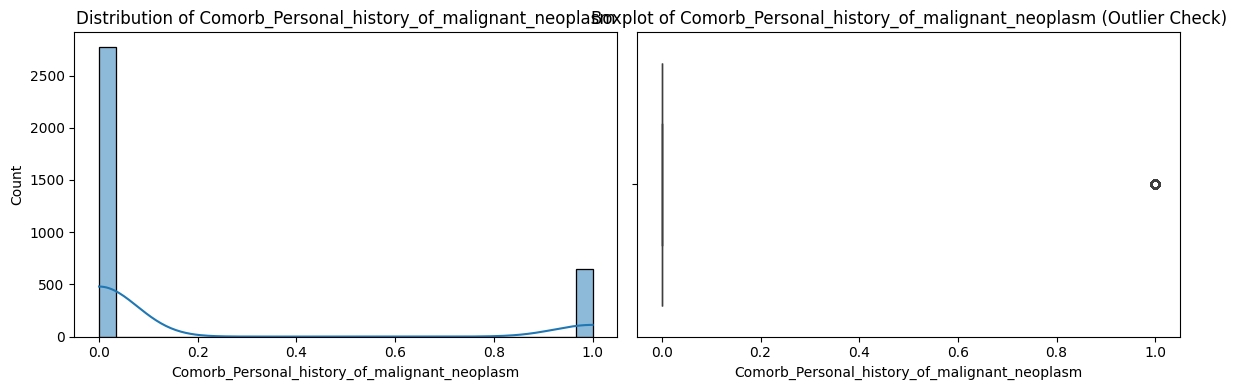

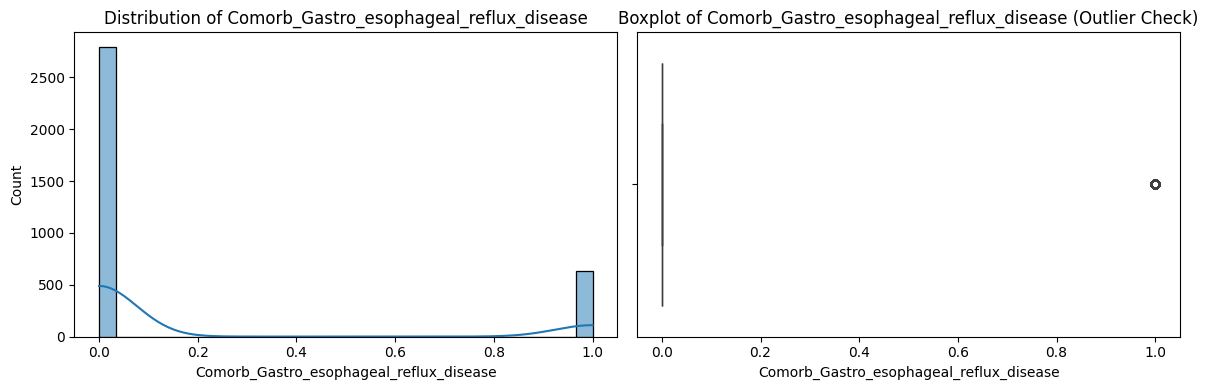

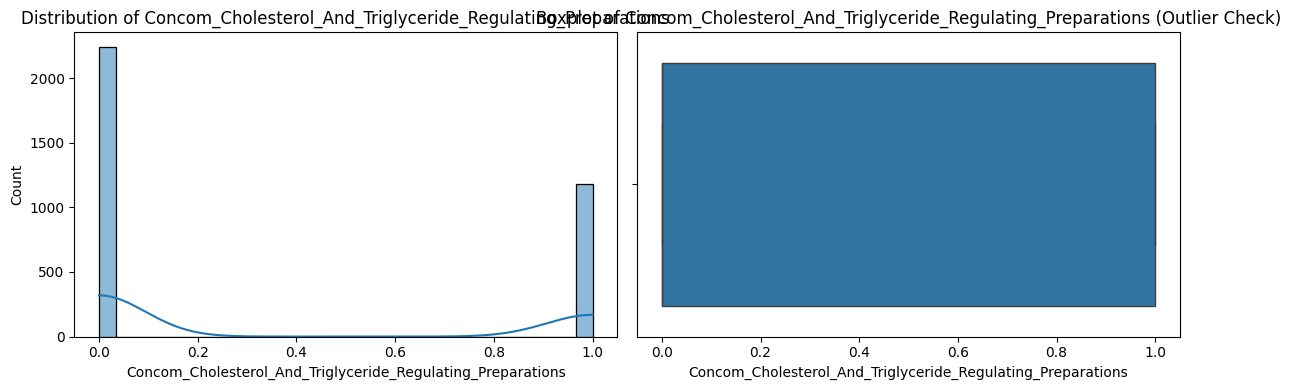

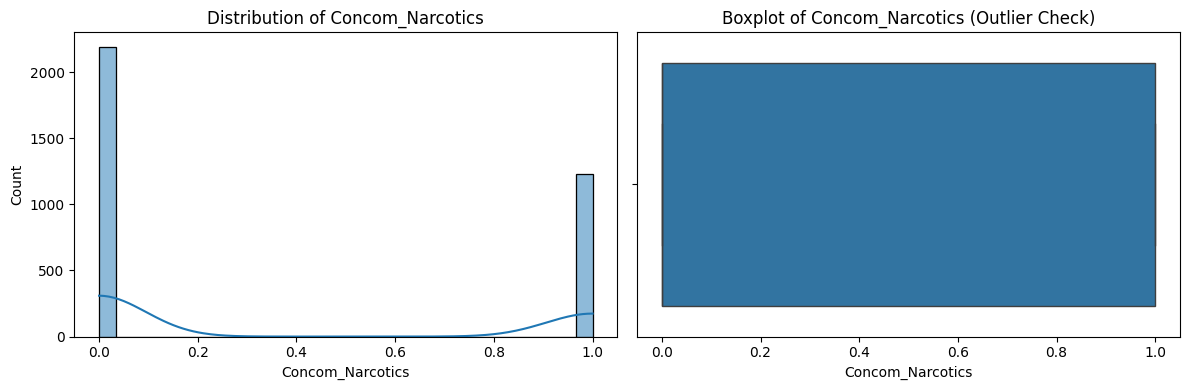

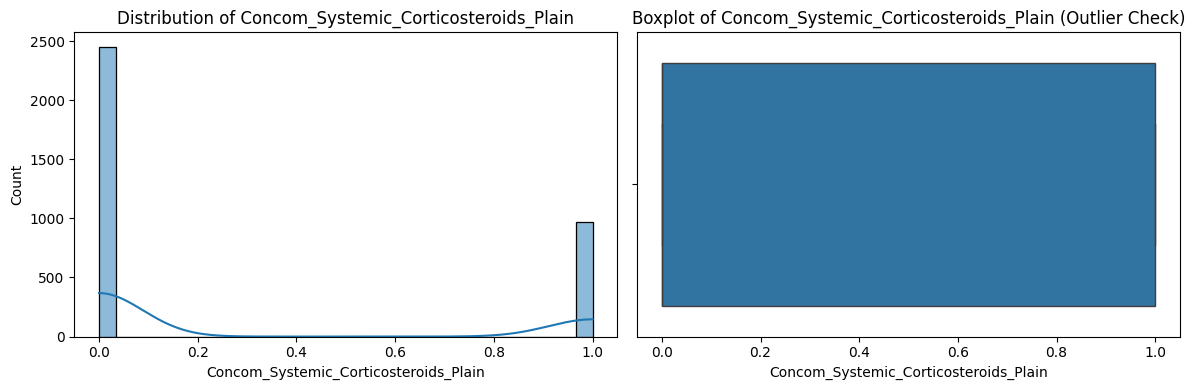

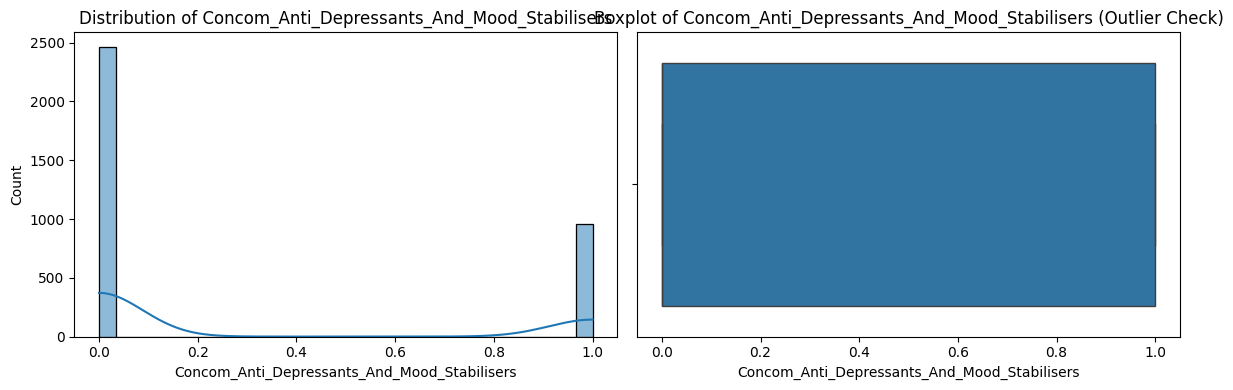

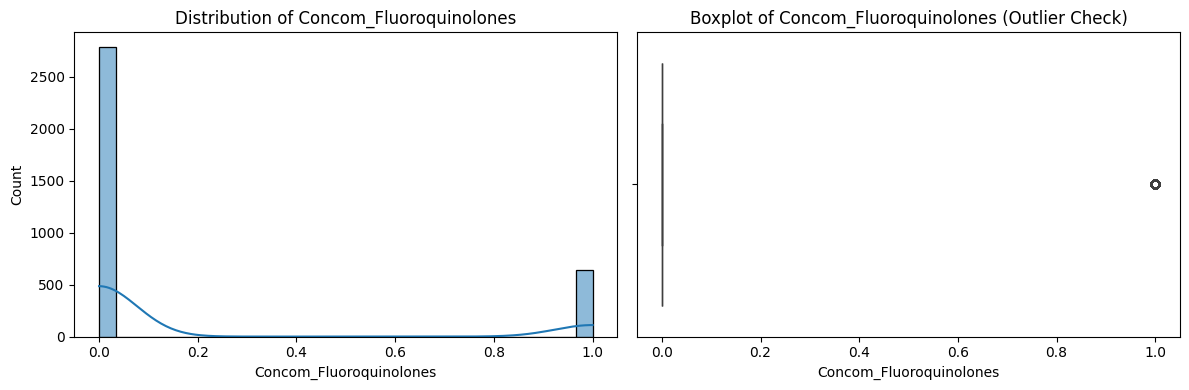

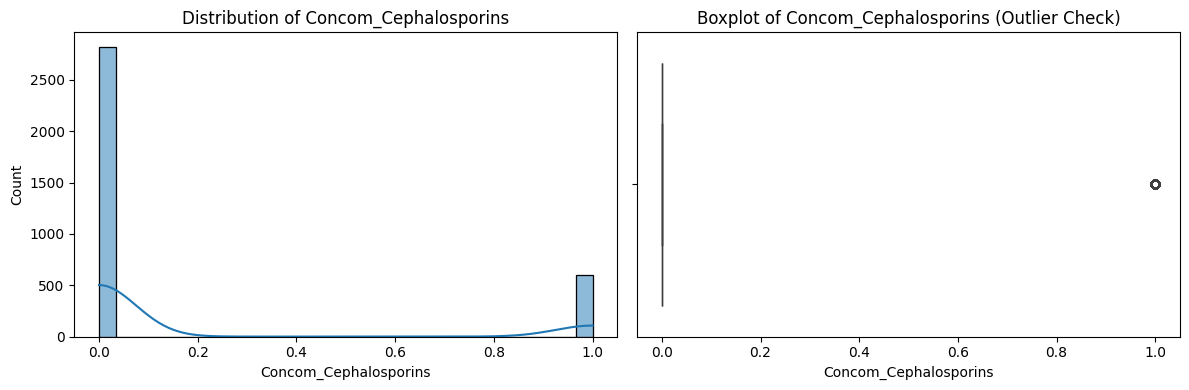

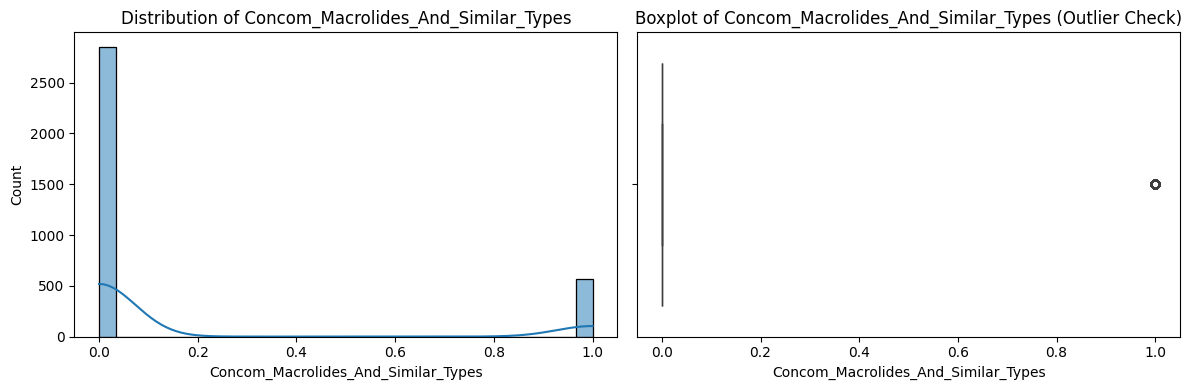

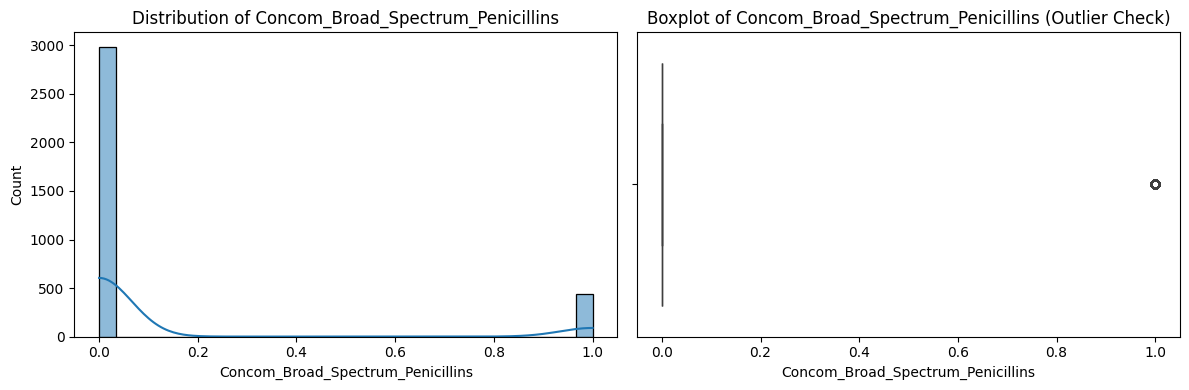

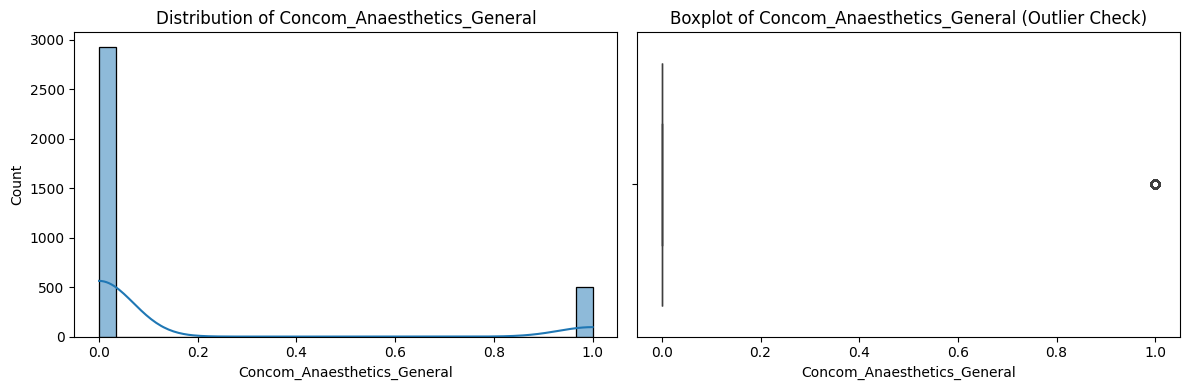

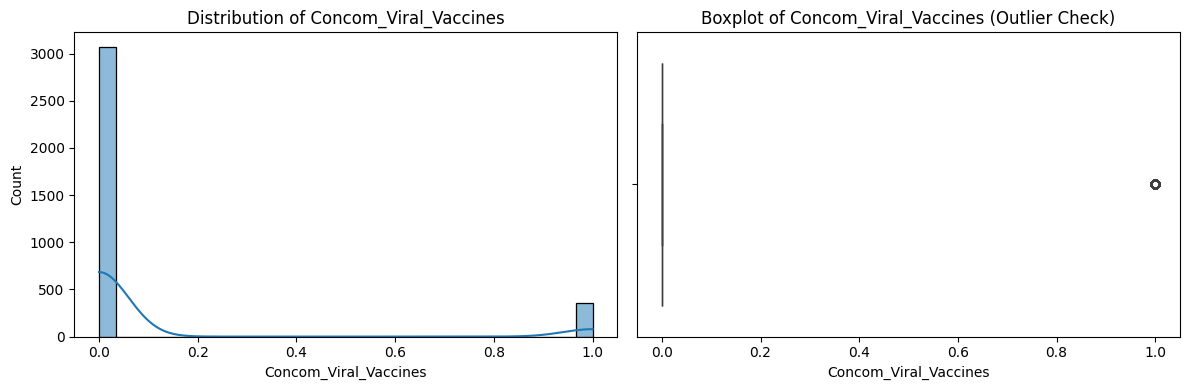

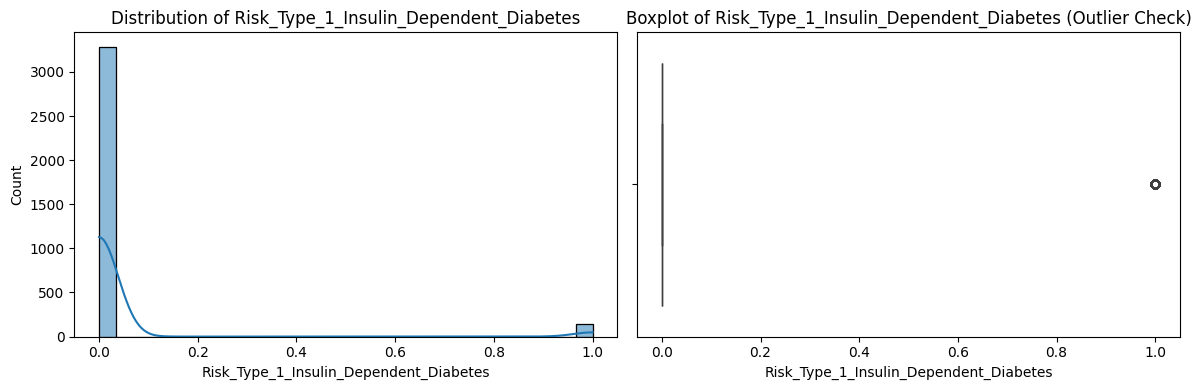

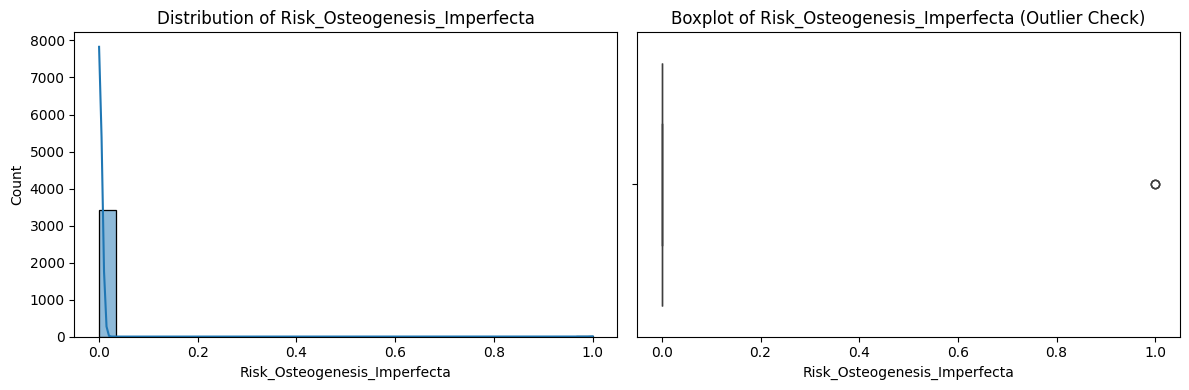

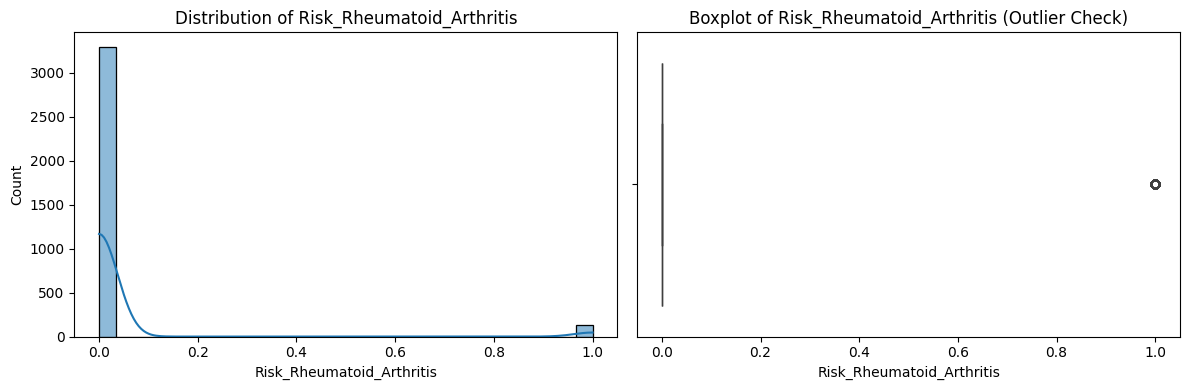

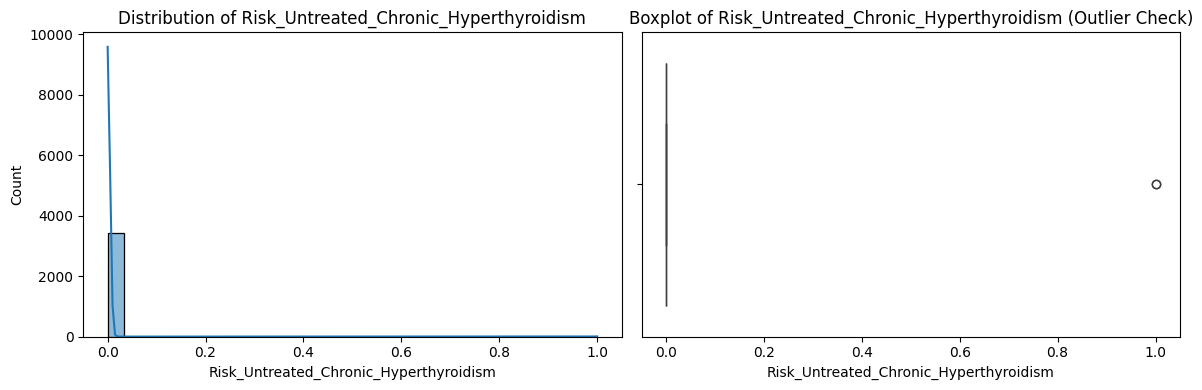

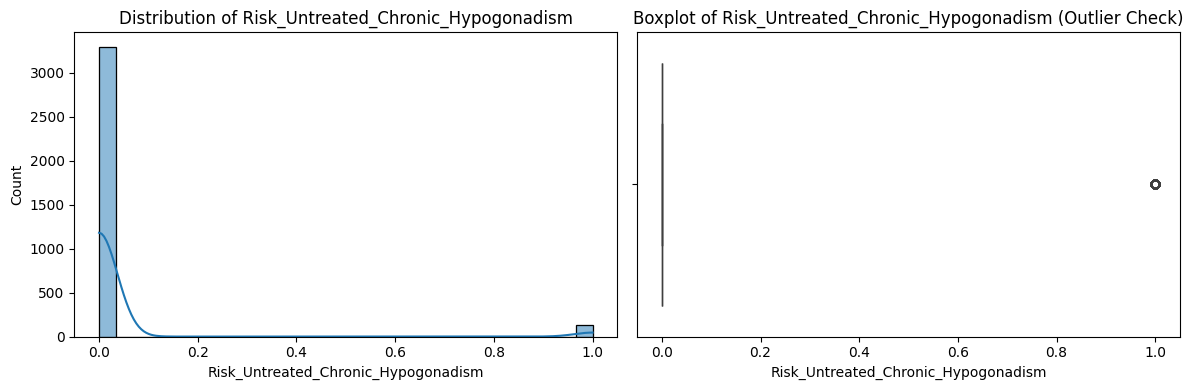

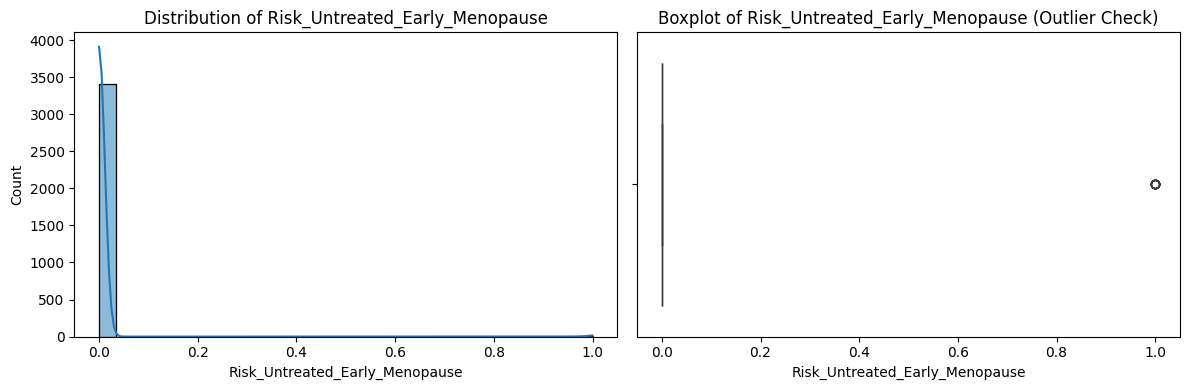

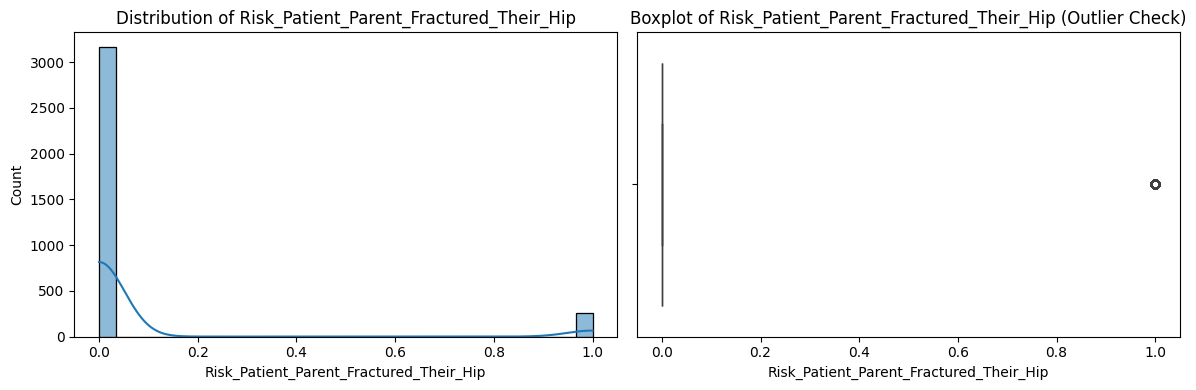

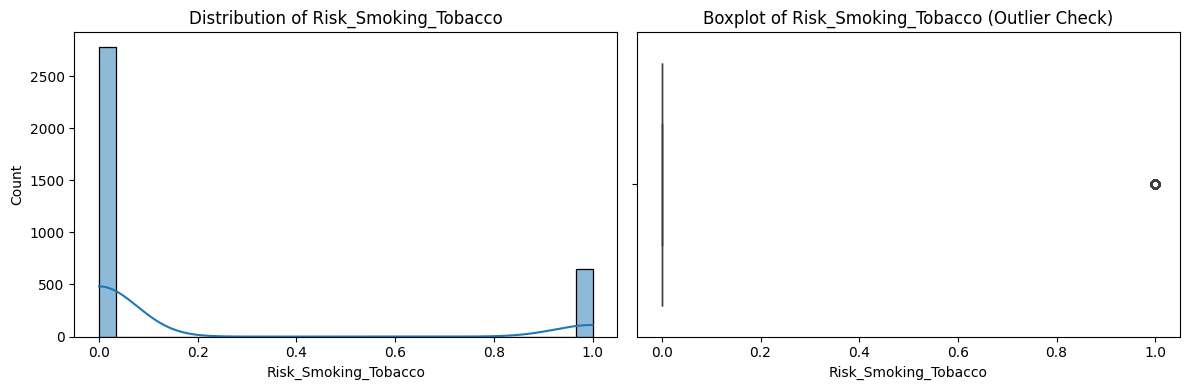

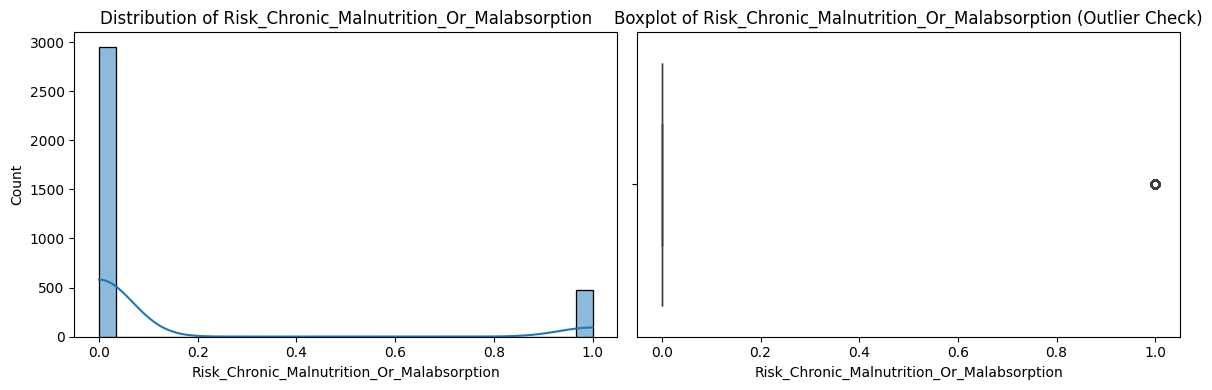

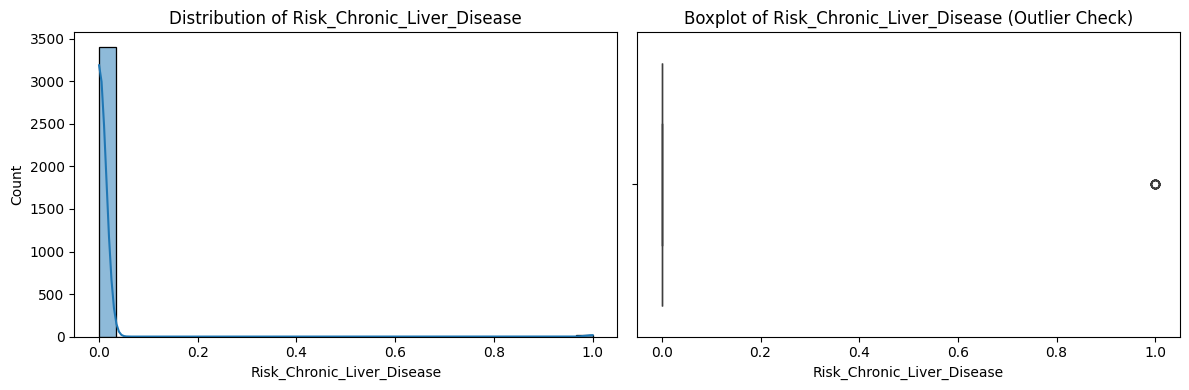

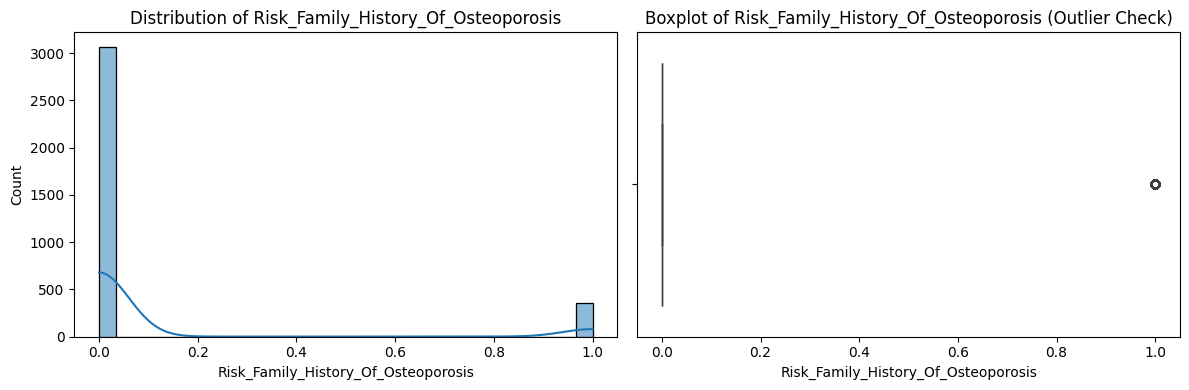

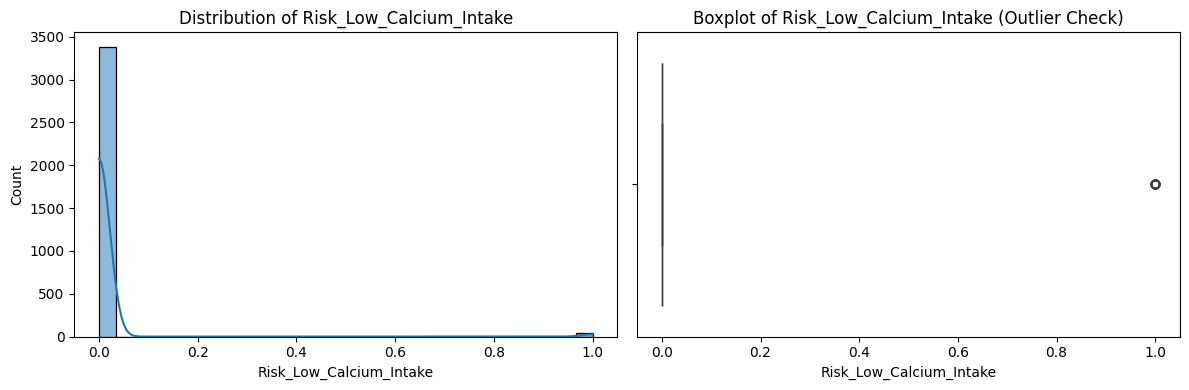

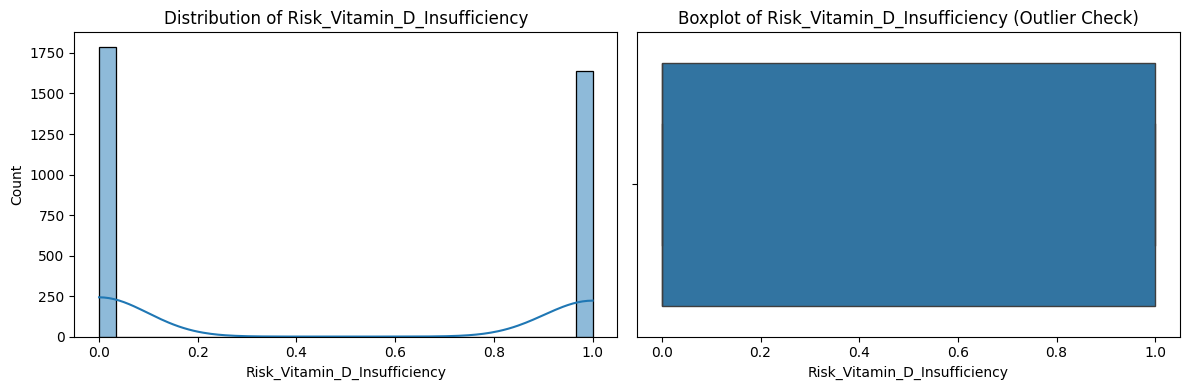

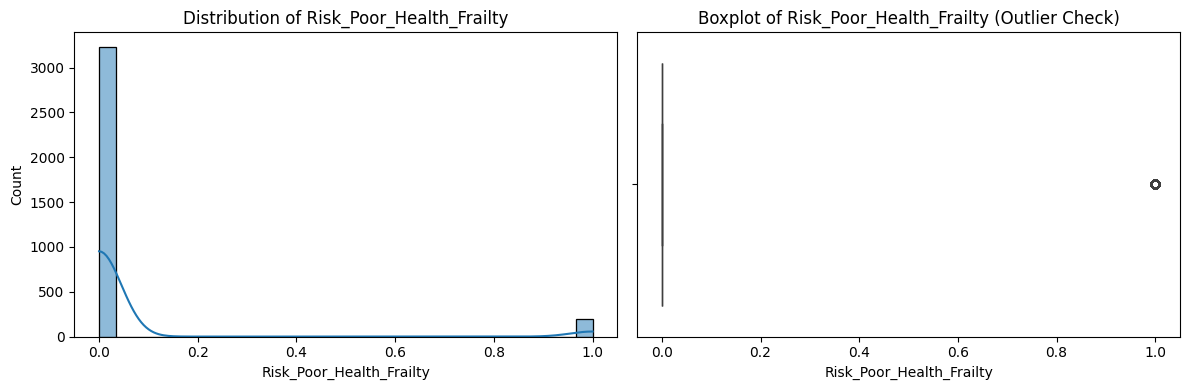

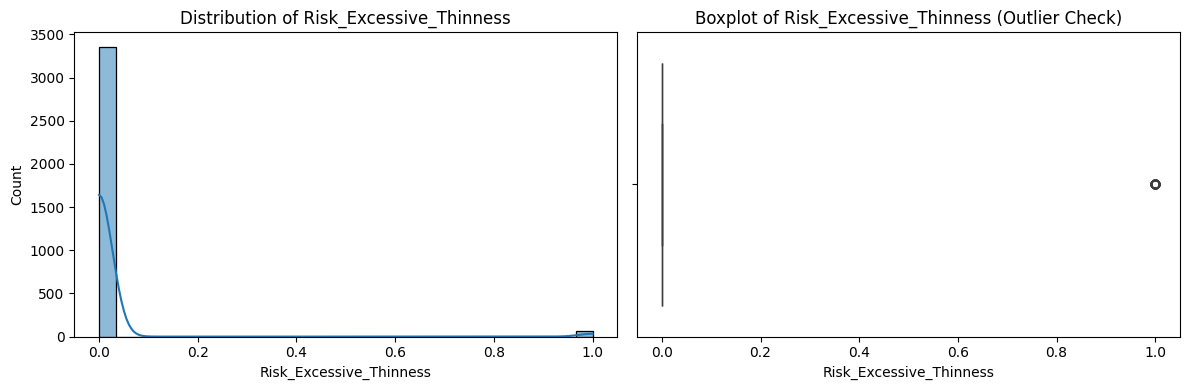

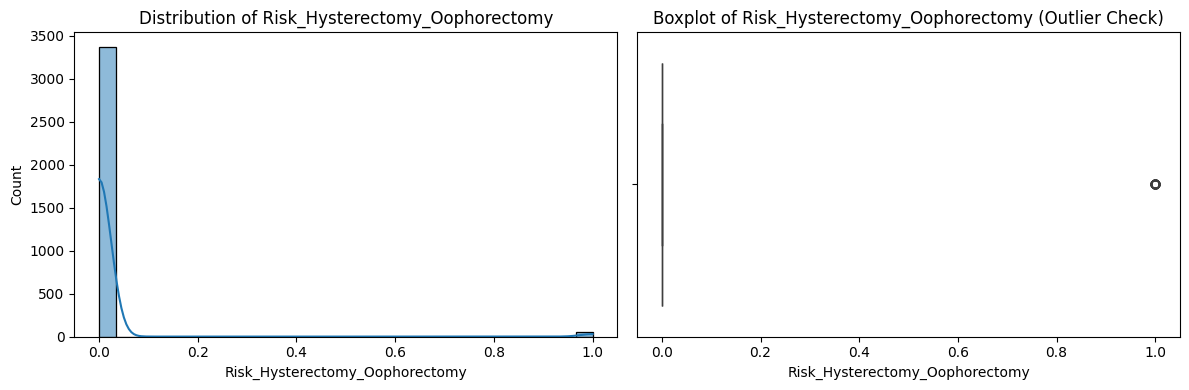

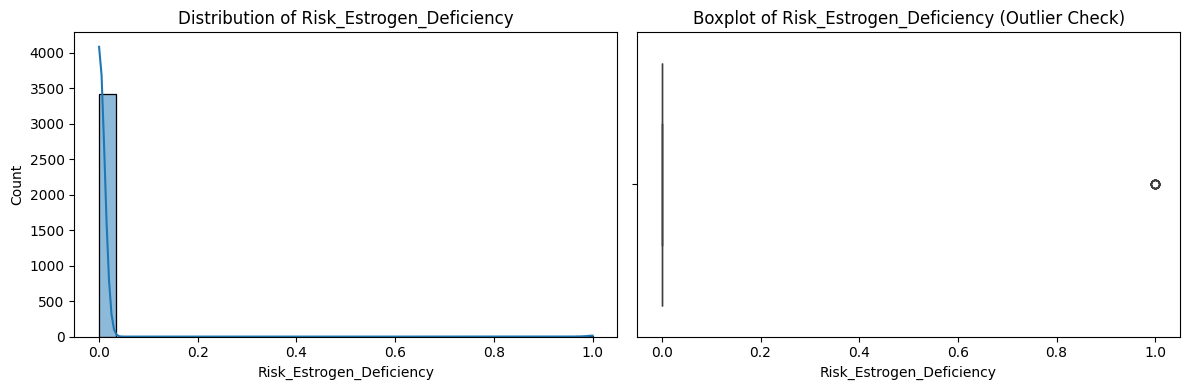

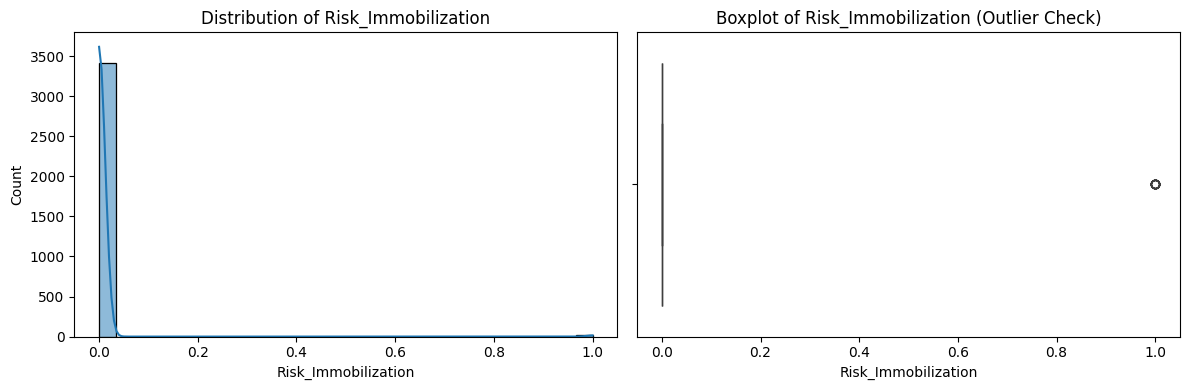

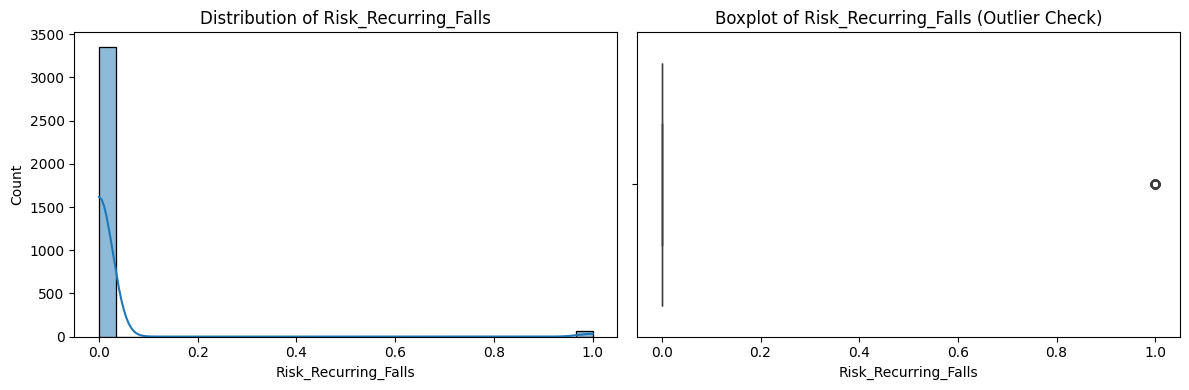

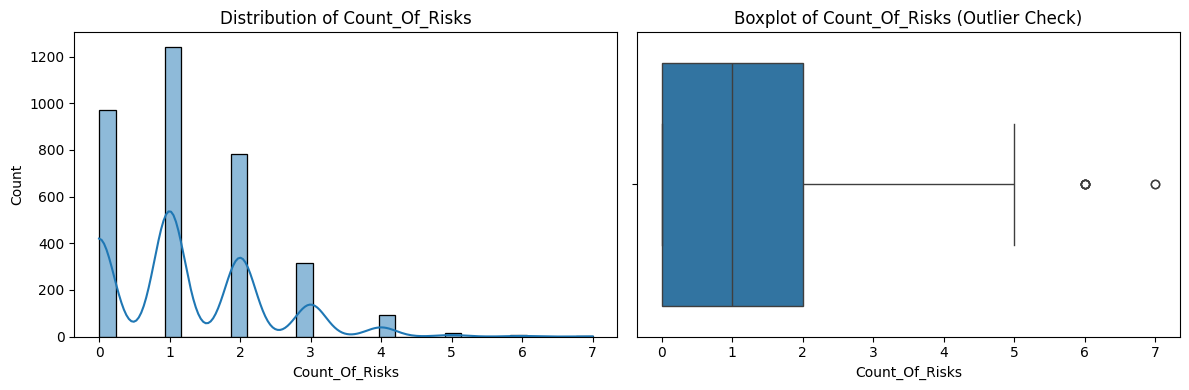

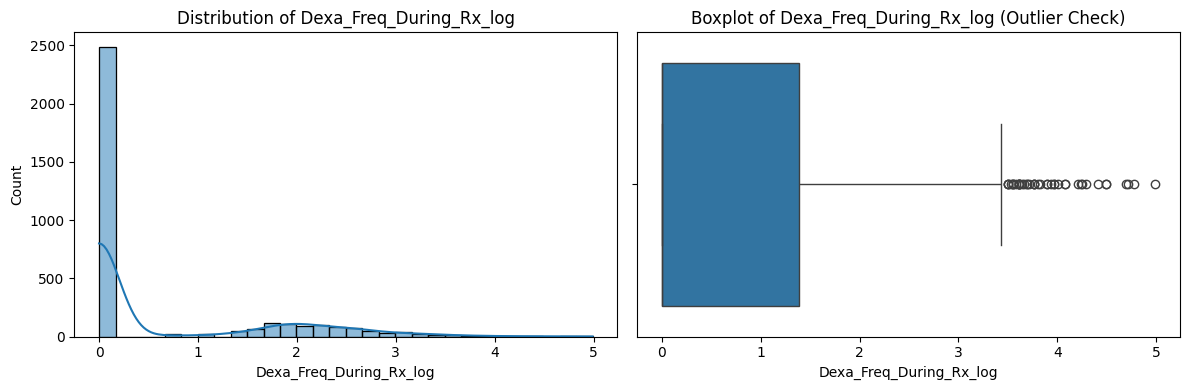

In [42]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Drop 'Persistency_Flag' if it's in the list
if 'Persistency_Flag' in num_cols:
    num_cols = num_cols.drop('Persistency_Flag')

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution of {col}')
    
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} (Outlier Check)')
    
    plt.tight_layout()
    plt.show()


Correlation Heatmap

In [48]:
import numpy as np

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


AttributeError: 'Index' object has no attribute 'corr'

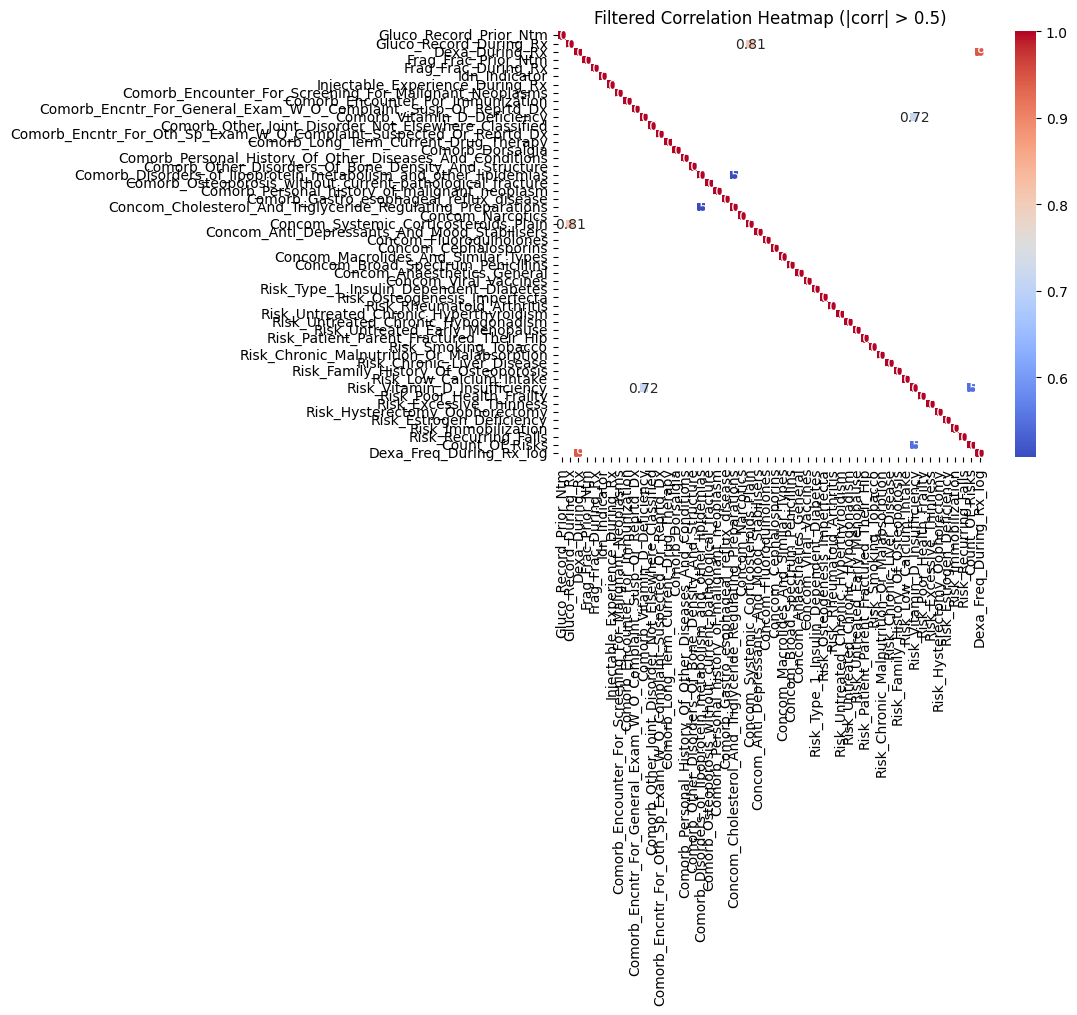

In [44]:
# Get correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Optionally: keep only strong correlations
high_corr_cols = corr[abs(corr) > 0.5].dropna(axis=1, how='all').dropna(axis=0, how='all')

plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_cols, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Filtered Correlation Heatmap (|corr| > 0.5)")
plt.tight_layout()
plt.show()




Persistency by Risk Factors (Example Insight)

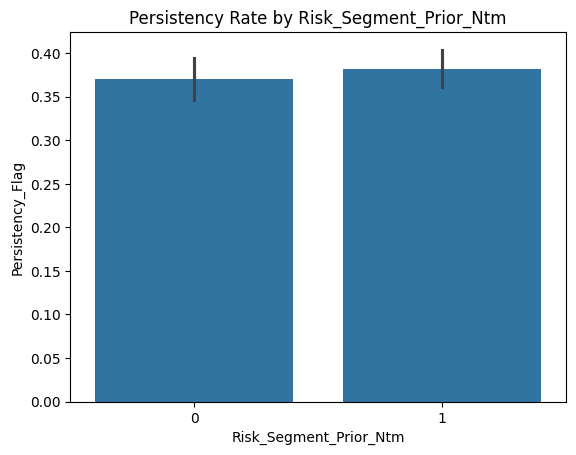

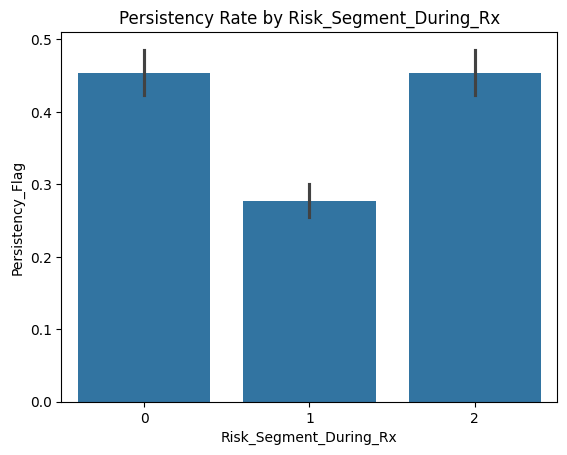

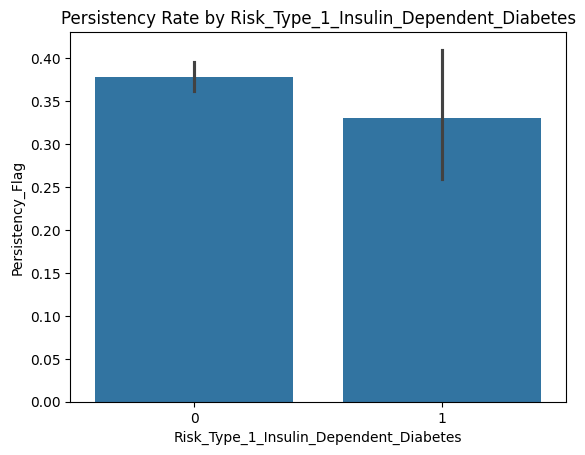

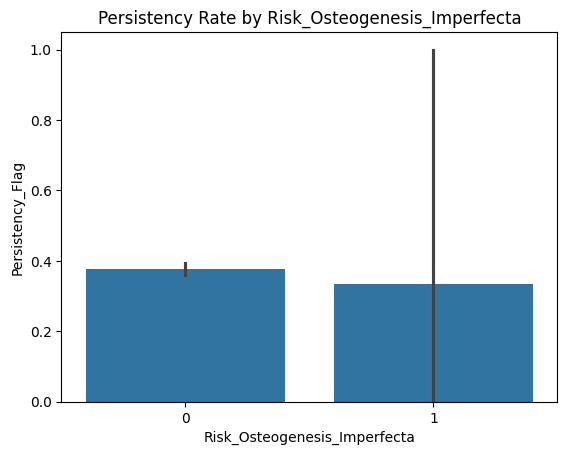

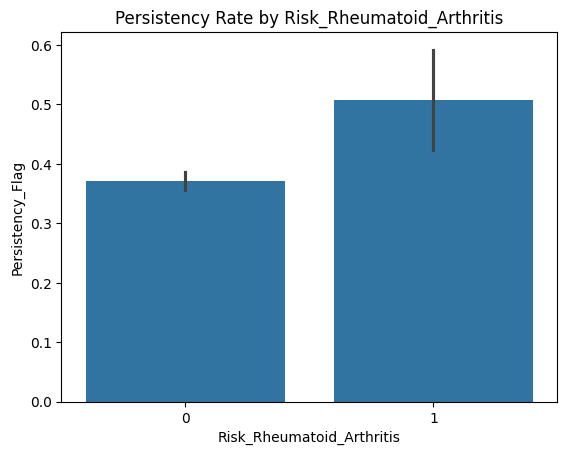

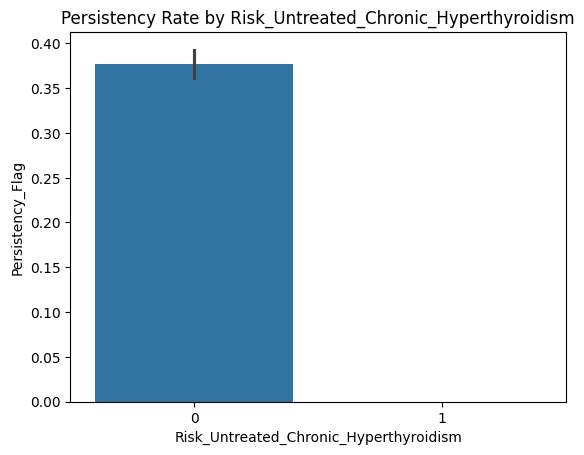

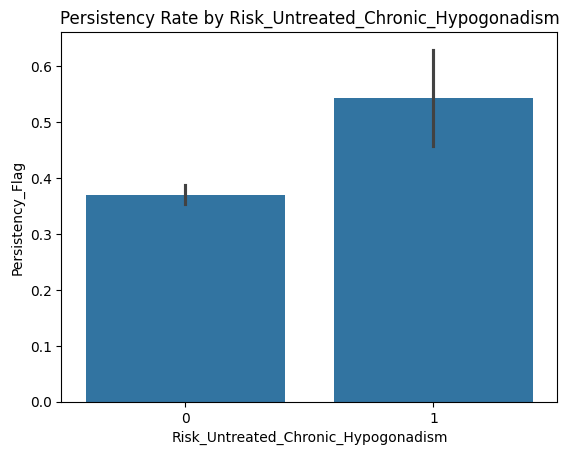

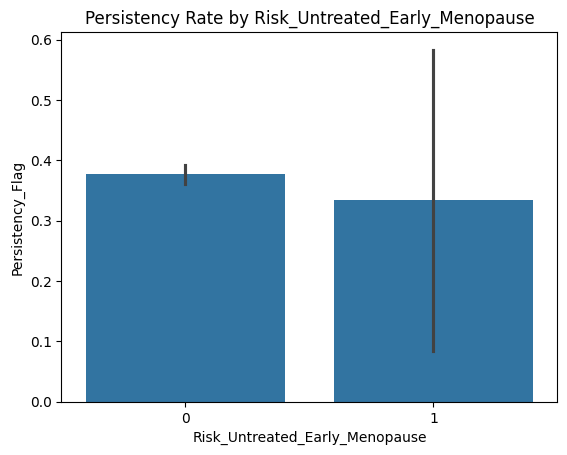

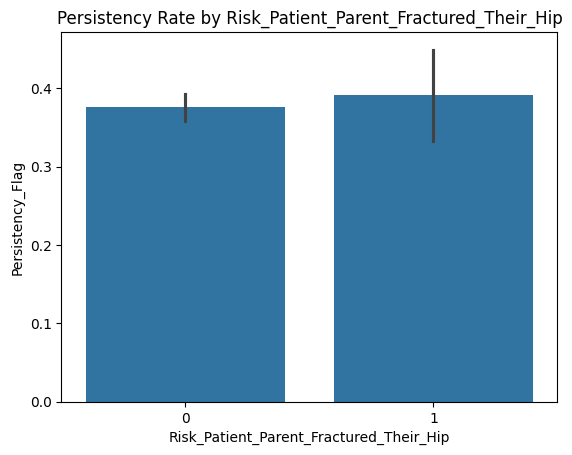

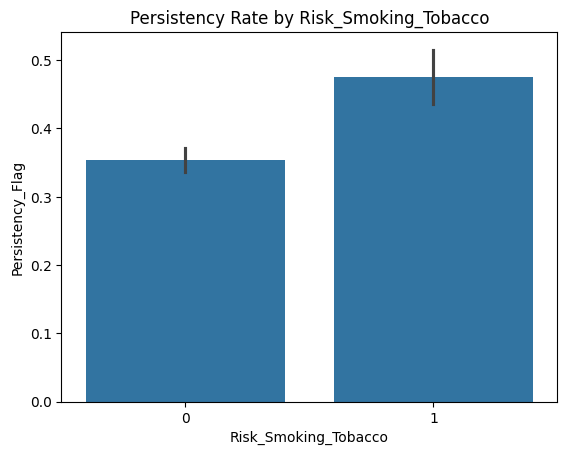

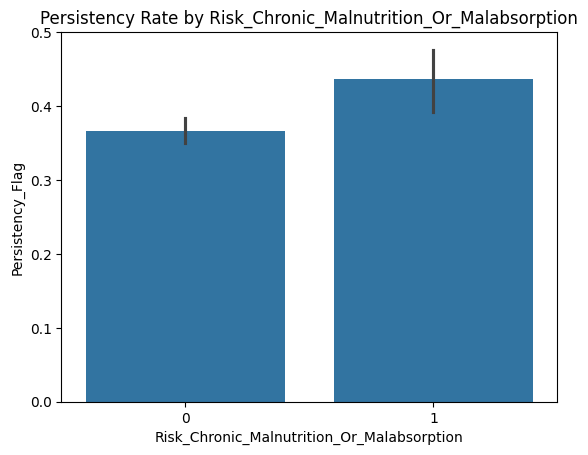

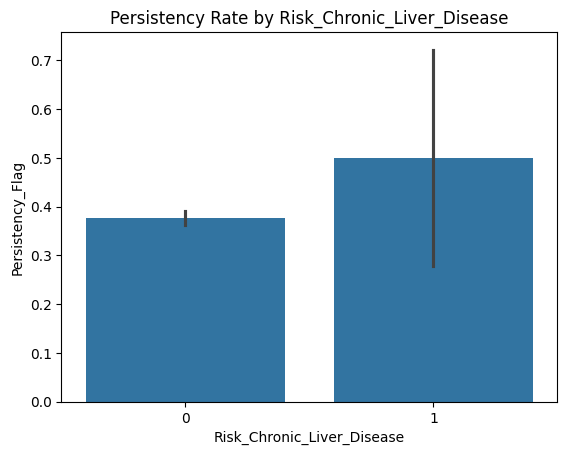

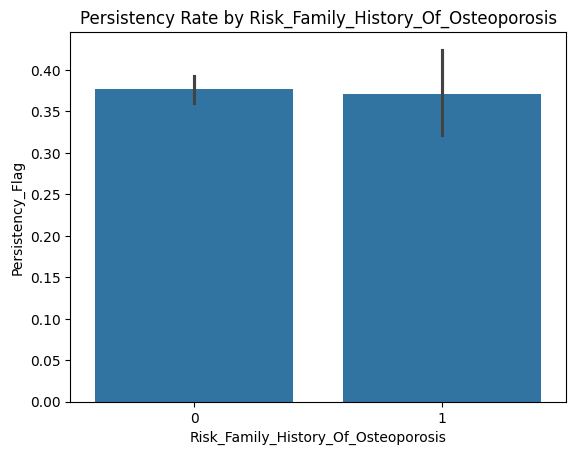

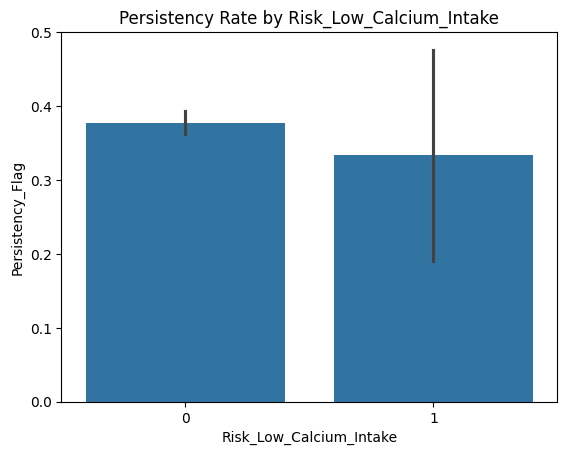

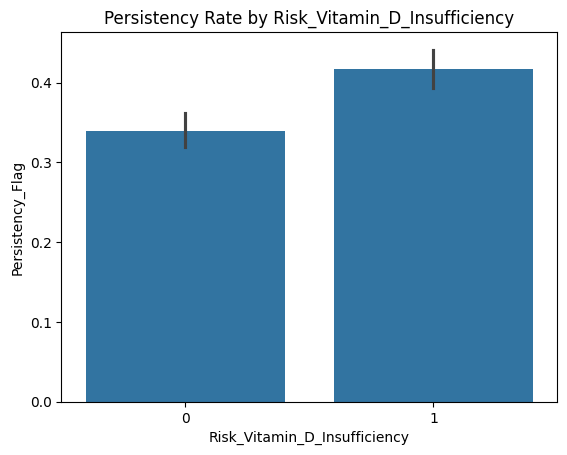

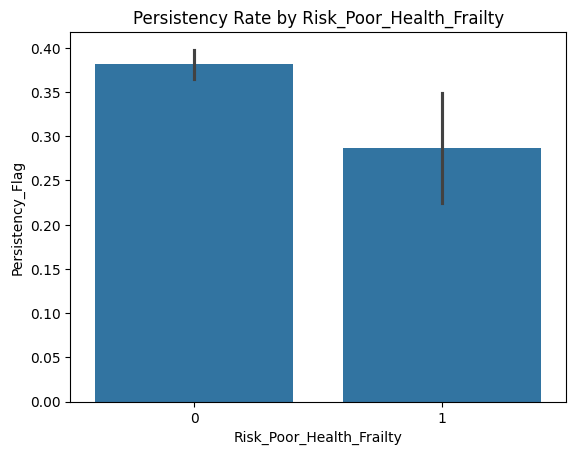

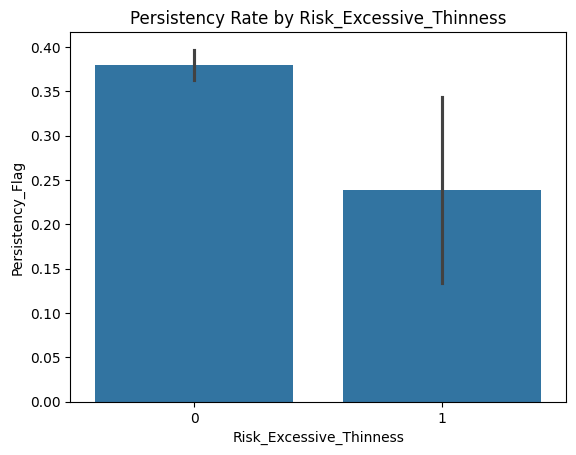

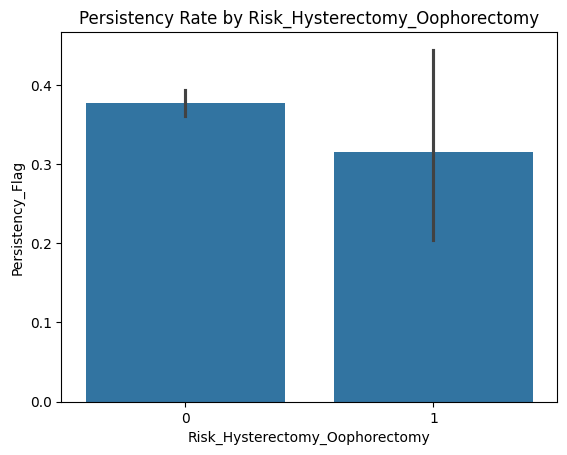

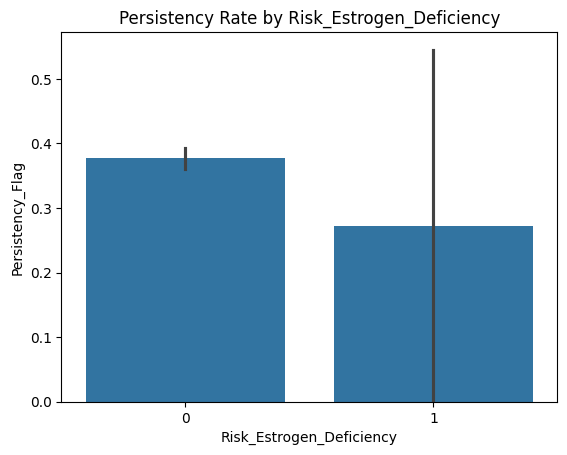

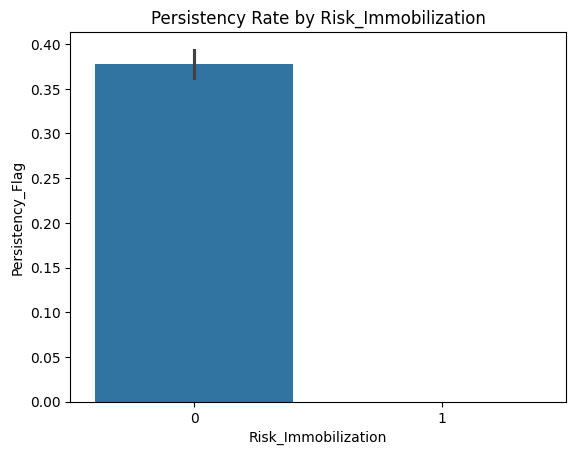

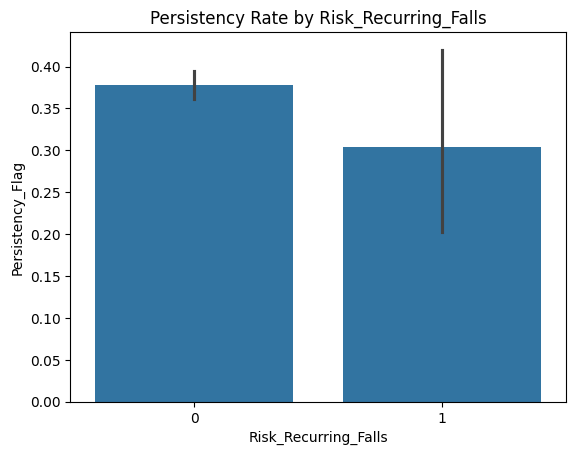

In [45]:
risk_cols = [col for col in df.columns if col.startswith("Risk_")]

for col in risk_cols:
    sns.barplot(data=df, x=col, y='Persistency_Flag')
    plt.title(f'Persistency Rate by {col}')
    plt.show()


In [46]:
print(f"Number of 'Categorical' columns: {len(cat_cols)}")
print(f"Number of 'Numerical' columns: {len(num_cols)}")
print(f"Number of 'Risk ' columns: {len(risk_cols)}")


Number of 'Categorical' columns: 67
Number of 'Numerical' columns: 52
Number of 'Risk ' columns: 21


<h1 style="color: darkblue; text-align: left;">Model Selection and Comparision</h1>

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Define feature matrix and target vector
X = df.drop(['Persistency_Flag', 'Ptid'], axis=1)
y = df['Persistency_Flag']

# Train-test split (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Report")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report")
print(classification_report(y_test, y_pred_rf))

# 3. Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Report")
print(classification_report(y_test, y_pred_gb))

# Optional 4. Stacking (with Logistic Regression as final estimator)
estimators = [('rf', rf), ('gb', gb)]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
print("\nStacking Classifier Report")
print(classification_report(y_test, y_pred_stack))



Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       654
           1       0.76      0.69      0.72       374

    accuracy                           0.81      1028
   macro avg       0.80      0.78      0.79      1028
weighted avg       0.81      0.81      0.81      1028


Random Forest Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       654
           1       0.76      0.68      0.71       374

    accuracy                           0.80      1028
   macro avg       0.79      0.78      0.78      1028
weighted avg       0.80      0.80      0.80      1028


Gradient Boosting Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       654
           1       0.77      0.71      0.73       374

    accuracy                           0.81      1028
   macro avg       0.80      0.79      0.80      102

<h1 style="color: darkblue; text-align: left;">Logistic regression</h1>

In [53]:
# Check Multicollinearity (optional but recommended):

# Constant features (e.g., only 1 unique value)
constant_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]
print("Constant columns:", constant_cols)

# Drop them
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)



Constant columns: ['Risk_Osteogenesis_Imperfecta']


In [62]:
# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       654
           1       0.76      0.69      0.72       374

    accuracy                           0.81      1028
   macro avg       0.80      0.78      0.79      1028
weighted avg       0.81      0.81      0.81      1028



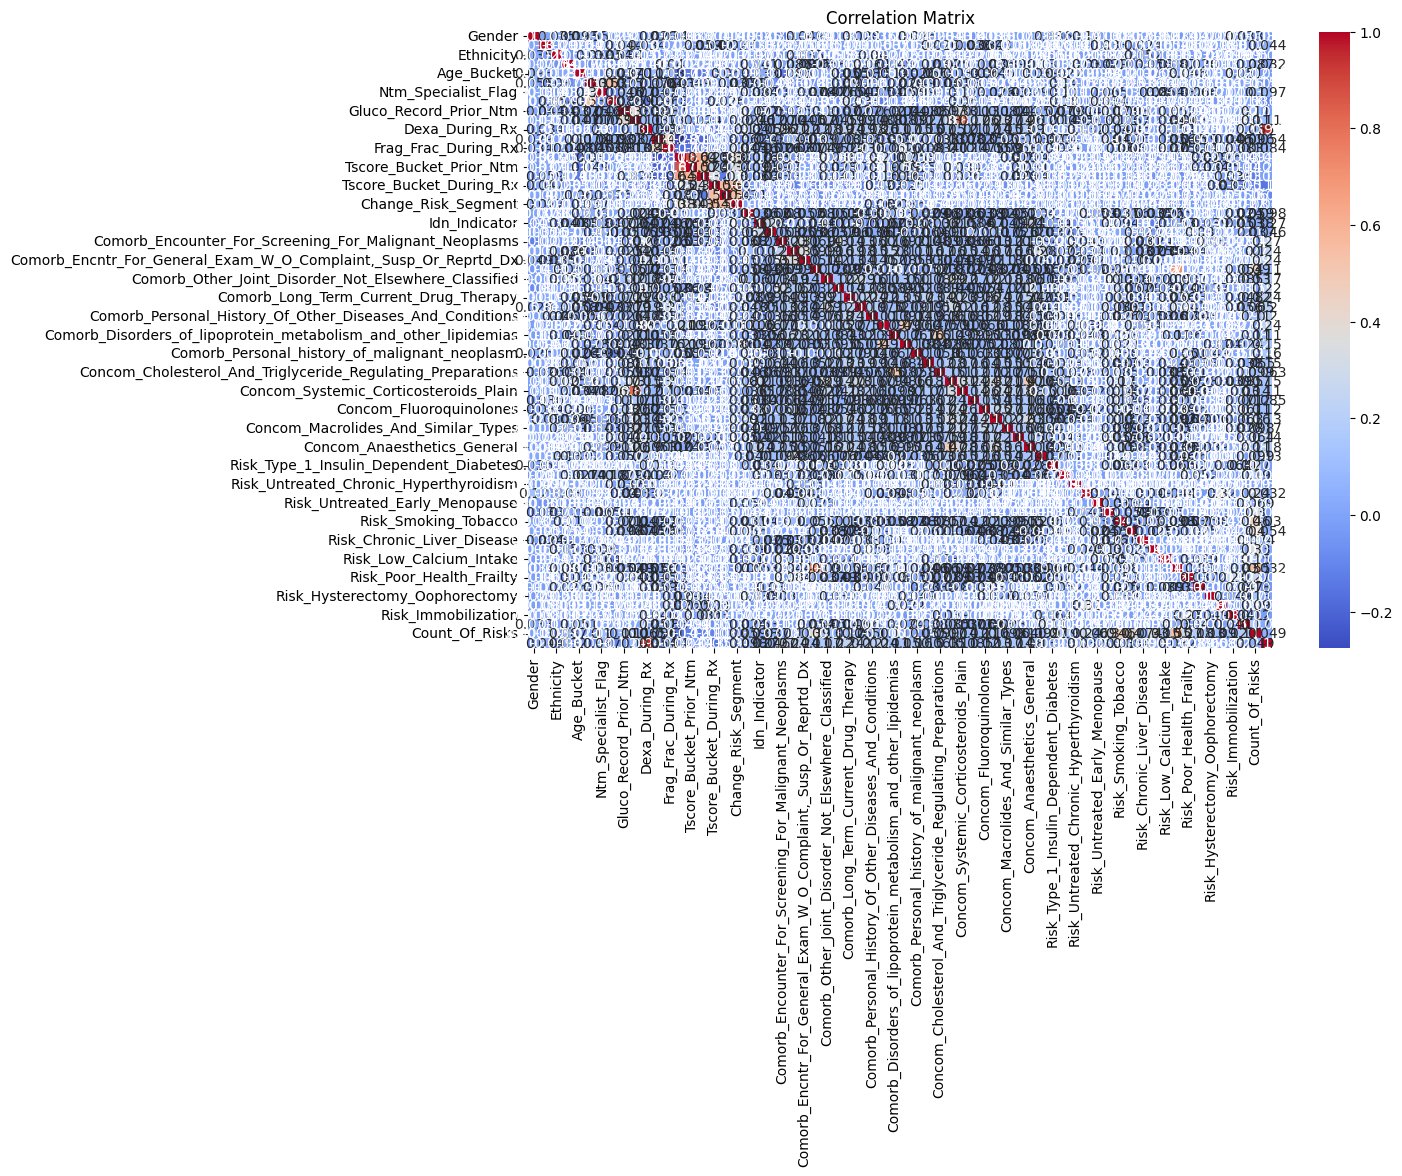

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [63]:
import statsmodels.api as sm

# Add constant
X_train_sm = sm.add_constant(X_train)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


         Current function value: 0.388206
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Persistency_Flag   No. Observations:                 2396
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                           65
Date:                Mon, 02 Jun 2025   Pseudo R-squ.:                  0.4162
Time:                        05:21:10   Log-Likelihood:                -930.14
converged:                      False   LL-Null:                       -1593.3
Covariance Type:            nonrobust   LLR p-value:                1.712e-234
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                           

C:\Users\shaik\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Save the model

import joblib
joblib.dump(lr, 'D:\London\Data_Work_London\Data_Analysis\Internship\Data_Glacier\Final_Project\logistic_model.pkl')


<h1 style="color: darkblue; text-align: left;">Confusion Matrix & ROC Curve for Logistic Regression</h1>

 Confusion Matrix

<Figure size 600x400 with 0 Axes>

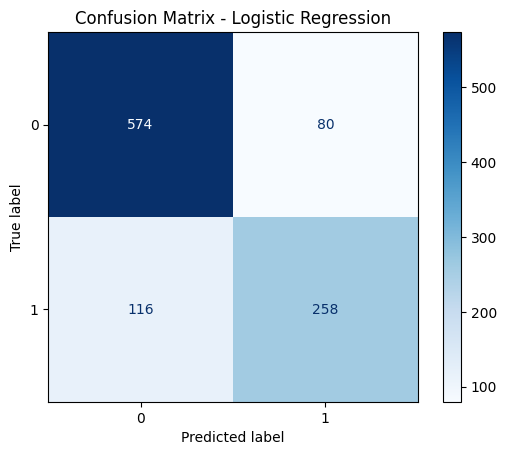

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred = lr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

# Plot
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()


 ROC Curve & AUC Score

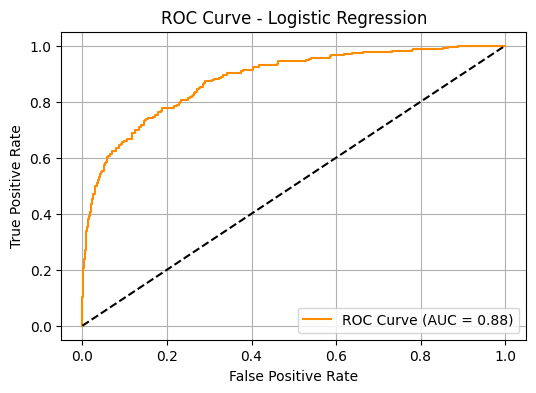

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for positive class
y_probs = lr.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
